# Telecom  Churn Case Study
by Saiyana Ramisetty and Sunil Indla

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**Definitions of Churn:**
Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

**High-value Churn:**
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Business Objective:**
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


# Importing Libraries need for the model building and analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

C:\Users\indla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\indla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\indla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

# Loading the dataset

In [2]:
# Path variable to hold the specific path of the data
path_var = '' # Replace with correct path variable

# Loading dataset
data = pd.read_csv(path_var + 'telecom_churn_data.csv', encoding = 'ISO-8859-1')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


# Understanding the dataset and it's attributes

In [3]:
data.shape

(99999, 226)

In [4]:
data.describe([0.25, 0.50, 0.75, 0.90, 0.99], include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [5]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# Verifying if the Identity Attribute (mobile number) is unique (Unique entries)
data.mobile_number.is_unique

True

In [7]:
data.mobile_number.nunique()

99999

# Categorical Attributes

In [8]:
# Getting only categorical attributes from the data
categorical_data = data.select_dtypes(include = ['object'])
categorical_cols = categorical_data.columns
categorical_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
# Removing columns which have one one value (not helpful for predictions)
for column in categorical_cols:
    print(column, data[column].nunique())

last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
last_date_of_month_9 1
date_of_last_rech_6 30
date_of_last_rech_7 31
date_of_last_rech_8 31
date_of_last_rech_9 30
date_of_last_rech_data_6 30
date_of_last_rech_data_7 31
date_of_last_rech_data_8 31
date_of_last_rech_data_9 30


In [10]:
# Getting columns which have unique values
single_value_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']

# Dropping columns
categorical_cols = [i for i in categorical_cols if i not in single_value_cols]
data = data.drop(single_value_cols, axis = 1)
data.shape

(99999, 222)

In [11]:
# Finding number of null values in categorical columns
data[categorical_cols].isnull().sum().sort_values(ascending = False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
date_of_last_rech_6          1607
dtype: int64

In [12]:
# Getting the percentages of the null values in each categorical attributes
round(100 * (data[categorical_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
dtype: float64

There are more than 50% missing values in the attributes for date of last data recharge. Thus dropping those columns as it is not helpful in imputing them.

In [13]:
# Handling missing values in categorical attributes
cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

# Dropping columns
data.drop(cols, axis = 1, inplace = True)
categorical_cols = [i for i in categorical_cols if i not in cols]

Rest of the categorical columns have less percentage of missing values. Hence imputing them with their mode value.

In [14]:
# Imputing the rest with mode
for column in categorical_cols:
    data[column].fillna(data[column].mode()[0], inplace = True)
    
# Checking the missing values after imputation
data[categorical_cols].isnull().sum() * 100 / data.shape[0]

date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
date_of_last_rech_9    0.0
dtype: float64

### Derived Variables for Categorical Attributes

As date of recharge might vary hugely from one customer to another, deriving a new attribute which can specify if the user has recharged in the first half of the month or later.

In [15]:
# Understanding the categorical attributes
for column in categorical_cols:
    print(column, data[column].value_counts())

date_of_last_rech_6 6/30/2014    18567
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64
date_of_last_rech_7 7/31/2014    19055
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014

In [16]:
# Derived Columns for categorical variables
def checkDay(row, month):
    if(int(row[month].split('/')[1]) <= 15):
        return 0
    else:
        return 1
    
data['last_recharge_month_end_6'] = data.apply(checkDay, month = 'date_of_last_rech_6', axis = 1)
data['last_recharge_month_end_7'] = data.apply(checkDay, month = 'date_of_last_rech_7', axis = 1)
data['last_recharge_month_end_8'] = data.apply(checkDay, month = 'date_of_last_rech_8', axis = 1)
data['last_recharge_month_end_9'] = data.apply(checkDay, month = 'date_of_last_rech_9', axis = 1)

data = data.drop(categorical_cols, axis = 1)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last_recharge_month_end_6,last_recharge_month_end_7,last_recharge_month_end_8,last_recharge_month_end_9
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,NaN,968,30.4,0.0,101.20,3.58,1,1,0,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1006,0.0,0.0,0.00,0.00,1,1,1,1
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,1.0,1103,0.0,0.0,4.17,0.00,1,1,0,1
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,2491,0.0,0.0,0.00,0.00,1,1,1,1
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,NaN,1526,0.0,0.0,0.00,0.00,1,1,0,1


# Numeric Variables

In [17]:
# Getting only numeric attributes from the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include = numerics)
numeric_cols = numeric_data.columns

In [18]:
# Removing columns which have one one value (not helpful for predictions)
for column in numeric_cols:
    print(column, data[column].nunique())

mobile_number 99999
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24313
onnet_mou_7 24336
onnet_mou_8 24089
onnet_mou_9 23565
offnet_mou_6 31140
offnet_mou_7 31023
offnet_mou_8 30908
offnet_mou_9 30077
roam_ic_mou_6 6512
roam_ic_mou_7 5230
roam_ic_mou_8 5315
roam_ic_mou_9 4827
roam_og_mou_6 8038
roam_og_mou_7 6639
roam_og_mou_8 6504
roam_og_mou_9 5882
loc_og_t2t_mou_6 13539
loc_og_t2t_mou_7 13411
loc_og_t2t_mou_8 13336
loc_og_t2t_mou_9 12949
loc_og_t2m_mou_6 20905
loc_og_t2m_mou_7 20637
loc_og_t2m_mou_8 20544
loc_og_t2m_mou_9 20141
loc_og_t2f_mou_6 3860
loc_og_t2f_mou_7 3863
loc_og_t2f_mou_8 3807
loc_og_t2f_mou_9 3758
loc_og_t2c_mou_6 2235
loc_og_t2c_mou_7 2426
loc_og_t2c_mou_8 2516
loc_og_t2c_mou_9 2332
loc_og_mou_6 26372
loc_og_mou_7 26091
loc_og_mou_8 25990
loc_og_mou_9 25376
std_og_t2t_mou_6 18244
std_og_t2t_mou_7 18567
std_og_t2t_mou_8 18291
std_og_t2t_mou_9 17934
std_og_t2m_mou_6 19734
std_og_t2m_mou

In [19]:
# Getting columns which have unique values
single_value_cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

# Dropping columns
numeric_cols = [i for i in numeric_cols if i not in single_value_cols]
data = data.drop(single_value_cols, axis = 1)
data.shape

(99999, 206)

In [20]:
# Finding number of null values in numeric columns
data[numeric_cols].isnull().sum().sort_values(ascending = False)

count_rech_3g_6       74846
count_rech_2g_6       74846
arpu_2g_6             74846
arpu_3g_6             74846
av_rech_amt_data_6    74846
                      ...  
last_day_rch_amt_8        0
last_day_rch_amt_9        0
vol_2g_mb_6               0
vol_2g_mb_7               0
mobile_number             0
Length: 206, dtype: int64

In [21]:
# Getting the percentages of the null values in each numeric attributes
round(100 * (data[numeric_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

count_rech_3g_6       74.85
count_rech_2g_6       74.85
arpu_2g_6             74.85
arpu_3g_6             74.85
av_rech_amt_data_6    74.85
                      ...  
last_day_rch_amt_8     0.00
last_day_rch_amt_9     0.00
vol_2g_mb_6            0.00
vol_2g_mb_7            0.00
mobile_number          0.00
Length: 206, dtype: float64

Checking if there are any such attributes which might be helpful for prediction, which have higher number of missing values.

In [22]:
# Columns with more than 50% missing values
colmns_missing_data = round(100*(data.isnull().sum()/len(data.index)), 2)
colmns_missing_data[colmns_missing_data >= 50]

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
night_pck_user_9      74.08
fb_user_6             74.85
fb_user_7             74.43
fb_user_8             73.66
fb_user_9           

Understanding the recharge attribute values.

In [23]:
# Getting recharge attributes
recharge_cols = []
for column in data.columns:
    if(column.find('rech') != -1):
        recharge_cols.append(column)
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'last_recharge_month_end_6',
 'last_recharge_month_end_7',
 'last_recharge_month_end_8',
 'last_recharge_month_end_9']

In [24]:
# Distribution 
data[recharge_cols].describe(include = 'all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,last_recharge_month_end_6,last_recharge_month_end_7,last_recharge_month_end_8,last_recharge_month_end_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,...,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,0.875299,0.934979,0.915349,0.942169
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,...,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,0.330382,0.246564,0.278363,0.233424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,...,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,1.000000,1.000000,1.000000,1.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,...,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,1.000000,1.000000,1.000000,1.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,...,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,1.000000,1.000000,1.000000,1.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,...,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Missing values
data[recharge_cols].isnull().sum()*100 / data.shape[0]

total_rech_num_6              0.000000
total_rech_num_7              0.000000
total_rech_num_8              0.000000
total_rech_num_9              0.000000
total_rech_amt_6              0.000000
total_rech_amt_7              0.000000
total_rech_amt_8              0.000000
total_rech_amt_9              0.000000
max_rech_amt_6                0.000000
max_rech_amt_7                0.000000
max_rech_amt_8                0.000000
max_rech_amt_9                0.000000
total_rech_data_6            74.846748
total_rech_data_7            74.428744
total_rech_data_8            73.660737
total_rech_data_9            74.077741
max_rech_data_6              74.846748
max_rech_data_7              74.428744
max_rech_data_8              73.660737
max_rech_data_9              74.077741
count_rech_2g_6              74.846748
count_rech_2g_7              74.428744
count_rech_2g_8              73.660737
count_rech_2g_9              74.077741
count_rech_3g_6              74.846748
count_rech_3g_7          

As we can see from the distribution, recharge columns have minimum value as 1 (min amount that the user can recharge), assuming that the entries with null values as user not recharged. Hence imputing such entries with 0 as recharge amount.

In [26]:
data[recharge_cols] = data[recharge_cols].apply(lambda x : x.fillna(0))

# Missing values for recharge cols after imputation
data[recharge_cols].isnull().sum()*100 / data.shape[0]

total_rech_num_6             0.0
total_rech_num_7             0.0
total_rech_num_8             0.0
total_rech_num_9             0.0
total_rech_amt_6             0.0
total_rech_amt_7             0.0
total_rech_amt_8             0.0
total_rech_amt_9             0.0
max_rech_amt_6               0.0
max_rech_amt_7               0.0
max_rech_amt_8               0.0
max_rech_amt_9               0.0
total_rech_data_6            0.0
total_rech_data_7            0.0
total_rech_data_8            0.0
total_rech_data_9            0.0
max_rech_data_6              0.0
max_rech_data_7              0.0
max_rech_data_8              0.0
max_rech_data_9              0.0
count_rech_2g_6              0.0
count_rech_2g_7              0.0
count_rech_2g_8              0.0
count_rech_2g_9              0.0
count_rech_3g_6              0.0
count_rech_3g_7              0.0
count_rech_3g_8              0.0
count_rech_3g_9              0.0
av_rech_amt_data_6           0.0
av_rech_amt_data_7           0.0
av_rech_am

In [27]:
# Getting the percentages of the null values in each numeric attributes after recharge imputation
round(100 * (data[numeric_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

fb_user_6            74.85
arpu_3g_6            74.85
night_pck_user_6     74.85
arpu_2g_6            74.85
arpu_2g_7            74.43
                     ...  
total_rech_data_9     0.00
total_rech_data_8     0.00
total_rech_data_7     0.00
total_rech_data_6     0.00
mobile_number         0.00
Length: 206, dtype: float64

In [28]:
# fb_user
print(data['fb_user_6'].value_counts())
print(data['fb_user_7'].value_counts())
print(data['fb_user_8'].value_counts())
print(data['fb_user_9'].value_counts())

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64


In [29]:
# arpu_2g
print(data['arpu_2g_6'].value_counts())
print(data['arpu_2g_7'].value_counts())
print(data['arpu_2g_8'].value_counts())
print(data['arpu_2g_9'].value_counts())

0.00       6655
212.17     1239
122.07      554
63.96       405
0.01        404
           ... 
128.86        1
456.17        1
168.74        1
421.06        1
1382.97       1
Name: arpu_2g_6, Length: 6990, dtype: int64
0.00      7452
212.17    1321
0.01       620
122.07     464
63.96      381
          ... 
221.12       1
51.10        1
201.64       1
26.06        1
43.21        1
Name: arpu_2g_7, Length: 6586, dtype: int64
0.00      7937
212.17    1451
0.01       538
122.07     456
150.67     365
          ... 
62.30        1
15.55        1
128.46       1
93.30        1
636.81       1
Name: arpu_2g_8, Length: 6652, dtype: int64
0.00      7517
212.17    1532
122.07     462
424.34     391
0.01       372
          ... 
77.73        1
100.67       1
100.10       1
672.00       1
145.72       1
Name: arpu_2g_9, Length: 6795, dtype: int64


In [30]:
# arpu_3g
print(data['arpu_3g_6'].value_counts())
print(data['arpu_3g_7'].value_counts())
print(data['arpu_3g_8'].value_counts())
print(data['arpu_3g_9'].value_counts())

0.00      10930
212.17      667
0.01        439
122.07      418
63.96       306
          ...  
216.30        1
373.66        1
104.52        1
380.23        1
47.28         1
Name: arpu_3g_6, Length: 7418, dtype: int64
0.00      11175
212.17      747
0.01        652
122.07      343
63.96       285
          ...  
192.07        1
61.24         1
222.49        1
860.26        1
530.95        1
Name: arpu_3g_7, Length: 7246, dtype: int64
0.00      11209
212.17      729
0.01        665
122.07      314
63.96       257
          ...  
153.51        1
222.49        1
222.85        1
262.43        1
190.83        1
Name: arpu_3g_8, Length: 7787, dtype: int64
0.00      10881
212.17      697
0.01        403
122.07      334
63.96       264
          ...  
12.02         1
73.00         1
157.00        1
237.18        1
148.52        1
Name: arpu_3g_9, Length: 8063, dtype: int64


In [31]:
# night_pck_user
print(data['night_pck_user_6'].value_counts())
print(data['night_pck_user_7'].value_counts())
print(data['night_pck_user_8'].value_counts())
print(data['night_pck_user_9'].value_counts())

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64


From the above values, we can observe that these attributes have 0 or 1 as their values, imputing missing values with 0.

In [32]:
cols = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']
data[cols] = data[cols].apply(lambda x : x.fillna(0))
round(100 * (data[numeric_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

std_ic_mou_9        7.75
std_og_t2f_mou_9    7.75
std_ic_t2f_mou_9    7.75
std_og_mou_9        7.75
loc_og_t2t_mou_9    7.75
                    ... 
max_rech_data_9     0.00
max_rech_data_8     0.00
max_rech_data_7     0.00
max_rech_data_6     0.00
mobile_number       0.00
Length: 206, dtype: float64

We still have few attributes which have missing values with lesser percentages. Imputing them with their median values.

In [33]:
for column in numeric_cols:
    data[column] = data[column].fillna(value = data[column].median())
round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending = False)

last_recharge_month_end_9    0.0
spl_og_mou_9                 0.0
loc_ic_t2t_mou_7             0.0
loc_ic_t2t_mou_6             0.0
total_og_mou_9               0.0
                            ... 
last_day_rch_amt_7           0.0
last_day_rch_amt_6           0.0
max_rech_amt_9               0.0
max_rech_amt_8               0.0
mobile_number                0.0
Length: 206, dtype: float64

In [34]:
# Checking for missing value after handling missing values completely
round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending = False)

last_recharge_month_end_9    0.0
spl_og_mou_9                 0.0
loc_ic_t2t_mou_7             0.0
loc_ic_t2t_mou_6             0.0
total_og_mou_9               0.0
                            ... 
last_day_rch_amt_7           0.0
last_day_rch_amt_6           0.0
max_rech_amt_9               0.0
max_rech_amt_8               0.0
mobile_number                0.0
Length: 206, dtype: float64

### Derived Variables for Numeric Attributes

Total internet recharge amount can be calculated from number of internet recharges and average data recharge amount.

In [35]:
# Total internet recharge amount =  number of internet recharges * average data recharge amount
data['total_data_recharge_amount_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_recharge_amount_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_recharge_amount_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_data_recharge_amount_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

Recharge amount can be of two types, internet and regular calls recharge. Thus deriving a new attribute for total recharge amount which includes data + regular.

In [36]:
# Total recharge amount = data recharge + normal recharge
data['total_recharge_amount_6'] = data['total_data_recharge_amount_6'] + data['total_rech_amt_6']
data['total_recharge_amount_7'] = data['total_data_recharge_amount_7'] + data['total_rech_amt_7']
data['total_recharge_amount_8'] = data['total_data_recharge_amount_8'] + data['total_rech_amt_8']
data['total_recharge_amount_9'] = data['total_data_recharge_amount_9'] + data['total_rech_amt_9']

Total number of calls can be derived from adding incoming and outgoing calls.

In [37]:
# Total calls = incoming calls + outgoing calls
data['total_calls_6'] = data['total_ic_mou_6'] + data['total_og_mou_6']
data['total_calls_7'] = data['total_ic_mou_7'] + data['total_og_mou_7']
data['total_calls_8'] = data['total_ic_mou_8'] + data['total_og_mou_8']
data['total_calls_9'] = data['total_ic_mou_9'] + data['total_og_mou_9']

Total internet usage can be calculated by adding 2g and 3g internet usage.

In [38]:
# Total internet usage = 2g usage + 3g usage
data['total_internet_6'] =  data['vol_2g_mb_6'] + data['vol_3g_mb_6']
data['total_internet_7'] =  data['vol_2g_mb_7'] + data['vol_3g_mb_7']
data['total_internet_8'] =  data['vol_2g_mb_8'] + data['vol_3g_mb_8']
data['total_internet_9'] =  data['vol_2g_mb_9'] + data['vol_3g_mb_9']

A user might churn based on the behaviour change in 8th month, thus capturing the change in 8th month when compared to 6th and 7th months is an important factor for churning.
This difference can be in some patterns such as usage difference or recharge difference.

In [39]:
# Getting all attributes for June month
june_cols = []
for column in data.columns:
    if(column.find('_6') != -1):
        june_cols.append(column)
        
# Getting all attributes for July month
july_cols = []
for column in data.columns:
    if(column.find('_7') != -1):
        july_cols.append(column)
        
# Getting all attributes for August month
august_cols = []
for column in data.columns:
    if(column.find('_8') != -1):
        august_cols.append(column)
        
# Getting all attributes for September month
sept_cols = []
for column in data.columns:
    if(column.find('_9') != -1):
        sept_cols.append(column)
        
# Calulating change attributes
for column in august_cols:
    colName = 'change_in_' + column
    data[colName] = data[column] - (data[column.replace('8', '6')] + data[column.replace('8', '7')]) / 2

In [40]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,change_in_monthly_2g_8,change_in_sachet_2g_8,change_in_monthly_3g_8,change_in_sachet_3g_8,change_in_fb_user_8,change_in_last_recharge_month_end_8,change_in_total_data_recharge_amount_8,change_in_total_recharge_amount_8,change_in_total_calls_8,change_in_total_internet_8
0,7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-55.0,5.440,-17.530
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,-0.5,2.0,0.0,0.0,0.5,0.0,23.0,77.0,560.770,311.435
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-125.5,-48.430,0.000
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,-22.275,0.000
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0.0,-0.5,0.0,0.0,0.0,-1.0,-28.0,-14.0,155.300,0.000


# Filtering high-value customers

**High-value Churn:**
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

We need to find customers with average first two month recharge is greater then or equal to 70 percentile of recharge amount for all customers for first two months, The monthly recharge comprise of data recharge and general recharge.

In [41]:
# calculate average recharge done by customer in June and July
data['average_recharge_amount_6_7'] = (data['total_recharge_amount_6'] + data['total_recharge_amount_7']) / 2

In [42]:
recharge_amount_threshold = data['average_recharge_amount_6_7'].quantile(0.7)
print("Recharge amount at 70th percentile: {0}".format(recharge_amount_threshold))

Recharge amount at 70th percentile: 478.0


In [43]:
# Retaining only those customers who have recharged their with more than or equal to 70th percentile amount
data = data.loc[data['average_recharge_amount_6_7'] >= recharge_amount_threshold, :]
data

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,change_in_sachet_2g_8,change_in_monthly_3g_8,change_in_sachet_3g_8,change_in_fb_user_8,change_in_last_recharge_month_end_8,change_in_total_data_recharge_amount_8,change_in_total_recharge_amount_8,change_in_total_calls_8,change_in_total_internet_8,average_recharge_amount_6_7
0,7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,...,0.0,0.0,0.0,0.0,-1.0,0.0,-55.0,5.440,-17.530,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,...,0.0,0.0,0.0,0.0,0.0,0.0,2453.0,-361.735,0.000,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,2.5,0.0,0.0,0.5,0.0,30.0,-369.0,-348.085,-541.505,696.0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,0.0,0.0,0.0,0.0,0.0,0.0,78.0,215.525,0.000,640.0
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,0.0,0.0,1.0,0.5,0.5,184.0,396.0,229.365,710.145,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,384.316,255.405,393.474,94.080,78.68,29.04,103.24,34.38,56.13,...,0.0,0.0,0.0,0.0,0.0,0.0,200.0,77.545,402.040,564.0
99984,7000661676,328.594,202.966,118.707,324.143,423.99,181.83,5.71,5.03,39.51,...,3.0,0.0,0.0,0.0,0.0,266.0,103.5,-322.915,-784.555,618.5
99986,7001729035,644.973,455.228,564.334,267.451,806.73,549.36,775.41,692.63,784.76,...,0.0,0.0,0.0,0.0,0.0,9.5,-814.0,46.515,-24.770,864.0
99988,7002111859,312.558,512.932,402.080,533.502,199.89,174.46,2.46,7.16,175.88,...,0.0,0.0,0.0,0.5,0.0,77.0,114.0,384.020,672.750,544.0


In [44]:
data.shape

(30001, 277)

After filtering the high value customers, we are left out with nearly 30k customers.

# Tagging Churners

In [45]:
# Deriving churn variable
data['churn'] = data.apply(lambda x: 1 if (x['total_calls_9'] == 0 and x['total_internet_9'] == 0) else 0, axis = 1)

# Understanding Churn Ratio

In [46]:
# checking churn counts
data['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [47]:
# Percentage of churners
data.churn.value_counts()*100 / data.shape[0]

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [48]:
# Understand the Churn Rate
churn_rate = (sum(data['churn'])/len(data['churn'].index))*100
churn_rate

8.136395453484884

In [49]:
# Understand the Churn Class Imbalance
imbalance = (sum(data['churn'] != 0)/sum(data['churn'] == 0))*100
imbalance

8.857039187227866

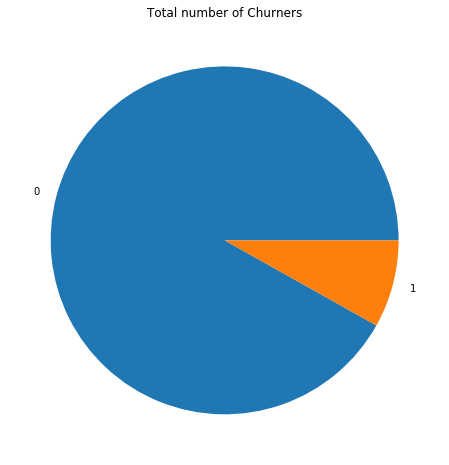

In [50]:
# Plotting pie chart
explode = (0.1, 0, 0, 0)
plt.figure(figsize = (15,8))
churn_counts = data['churn'].value_counts()
plt.pie(churn_counts.values, labels = churn_counts.index)
plt.title("Total number of Churners")
plt.show()

As we can observe from the above results, the data is skewed and there is an imbalance in class tags. The Churn percentage is nearly 8%. We will be handling the Class imbalance in the further steps.

# Deleting unwanted attributes for prediction

In [51]:
# Deleting variables created to filter high-value customers
data = data.drop('average_recharge_amount_6_7', axis = 1)
data.shape

(30001, 277)

In [52]:
# Deleting churn related features
data = data.drop(sept_cols, axis = 1)
data = data.loc[:, ~data.columns.str.startswith('sep')]
data.shape

(30001, 222)

In [53]:
# Deleting the identity variable
data = data.drop(['mobile_number'], axis = 1)
data.shape

(30001, 221)

# EDA

[None]

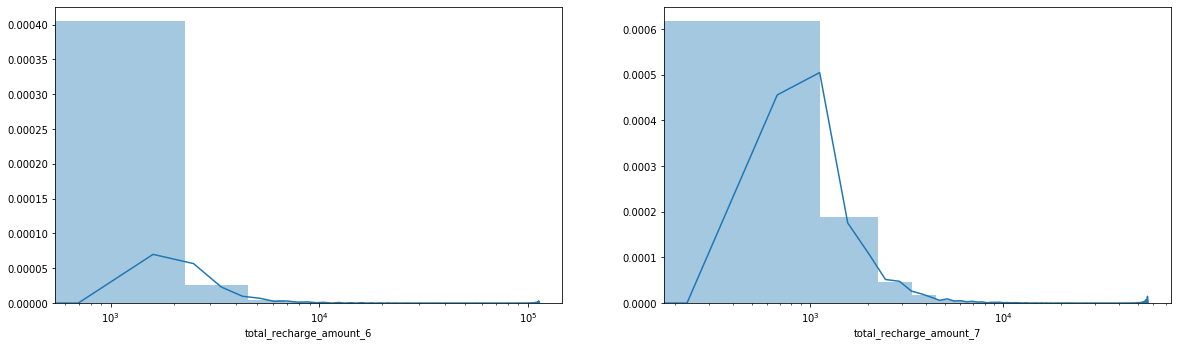

In [54]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
splot=sns.distplot(data['total_recharge_amount_6'])
splot.set(xscale="log")
plt.subplot(2,2,2)
splot=sns.distplot(data['total_recharge_amount_7'])
splot.set(xscale="log")

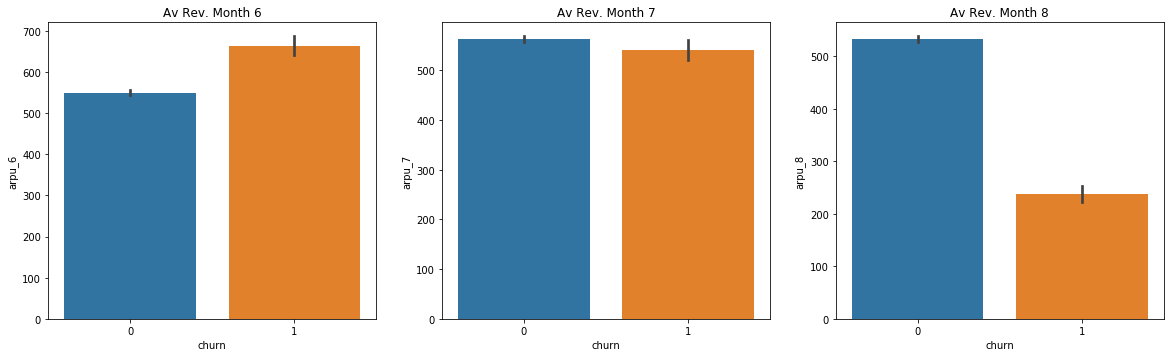

In [55]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Av Rev. Month 6')
sns.barplot(x = 'churn', y = 'arpu_6', data = data)
plt.subplot(2,3,2)
plt.title('Av Rev. Month 7')
sns.barplot(x = 'churn', y = 'arpu_7', data = data)
plt.subplot(2,3,3)
plt.title('Av Rev. Month 8')
sns.barplot(x = 'churn', y = 'arpu_8', data = data)

The Average Revenue per user metric Drop in month 8 indicates Churn

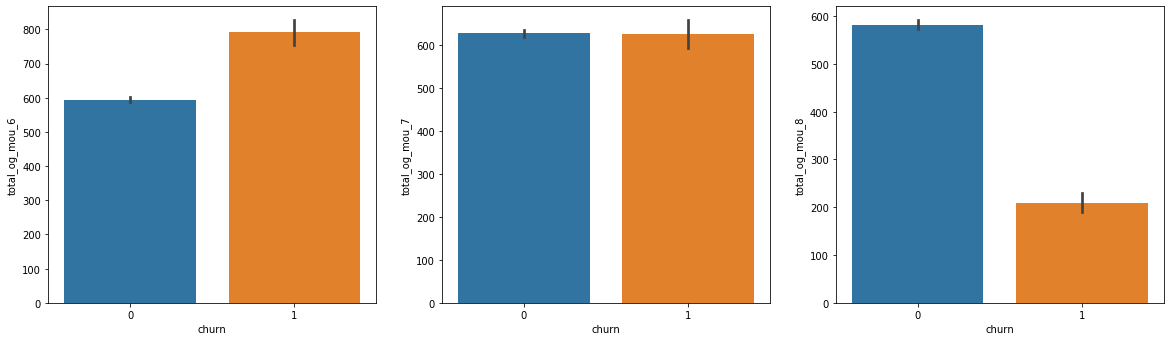

In [56]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_og_mou_6', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'total_og_mou_7', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'total_og_mou_8', data = data)

The Outgoing minutes Drop in month 8 indicates Churn

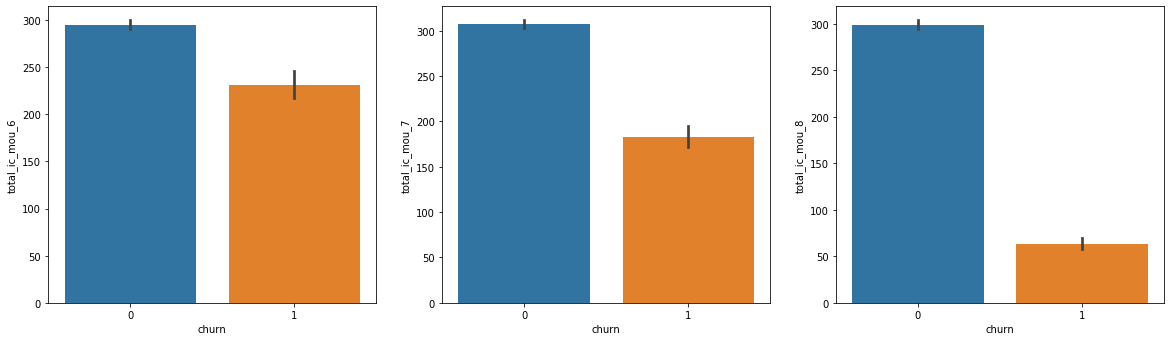

In [57]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_ic_mou_6', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'total_ic_mou_7', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'total_ic_mou_8', data = data)

The Incoming minutes usage Drop in month 8 indicates Churn

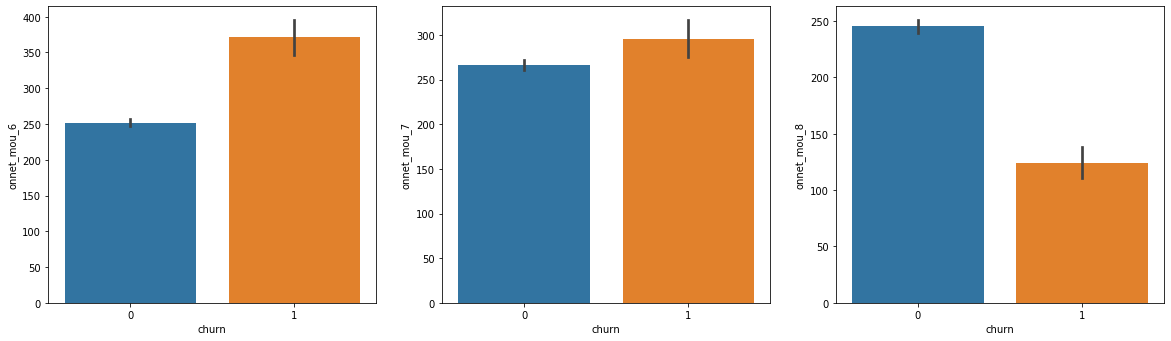

In [58]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'onnet_mou_6', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'onnet_mou_7', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'onnet_mou_8', data = data)

The Same Operator/network Calls Drop in month 8 indicates Churn

Most of the user have done the recharge below 10,000 rs

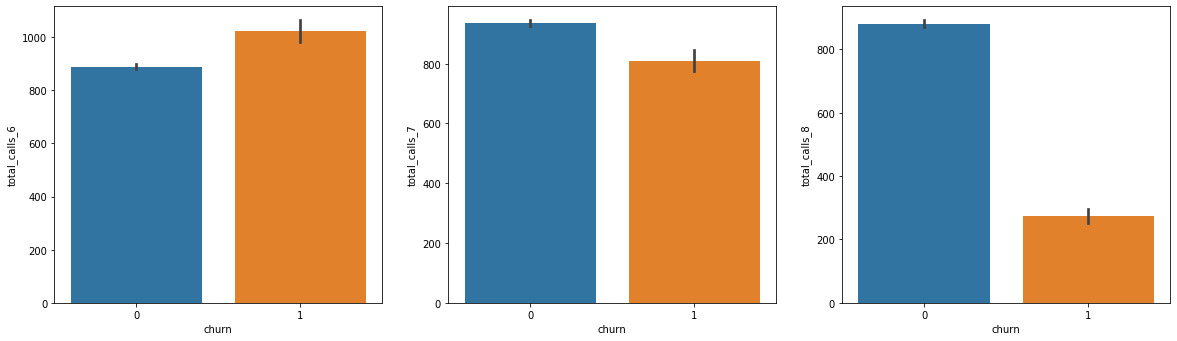

In [59]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_calls_6', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'total_calls_7', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'total_calls_8', data = data)

The total_calls Calls Drop in month 8 indicates Churn

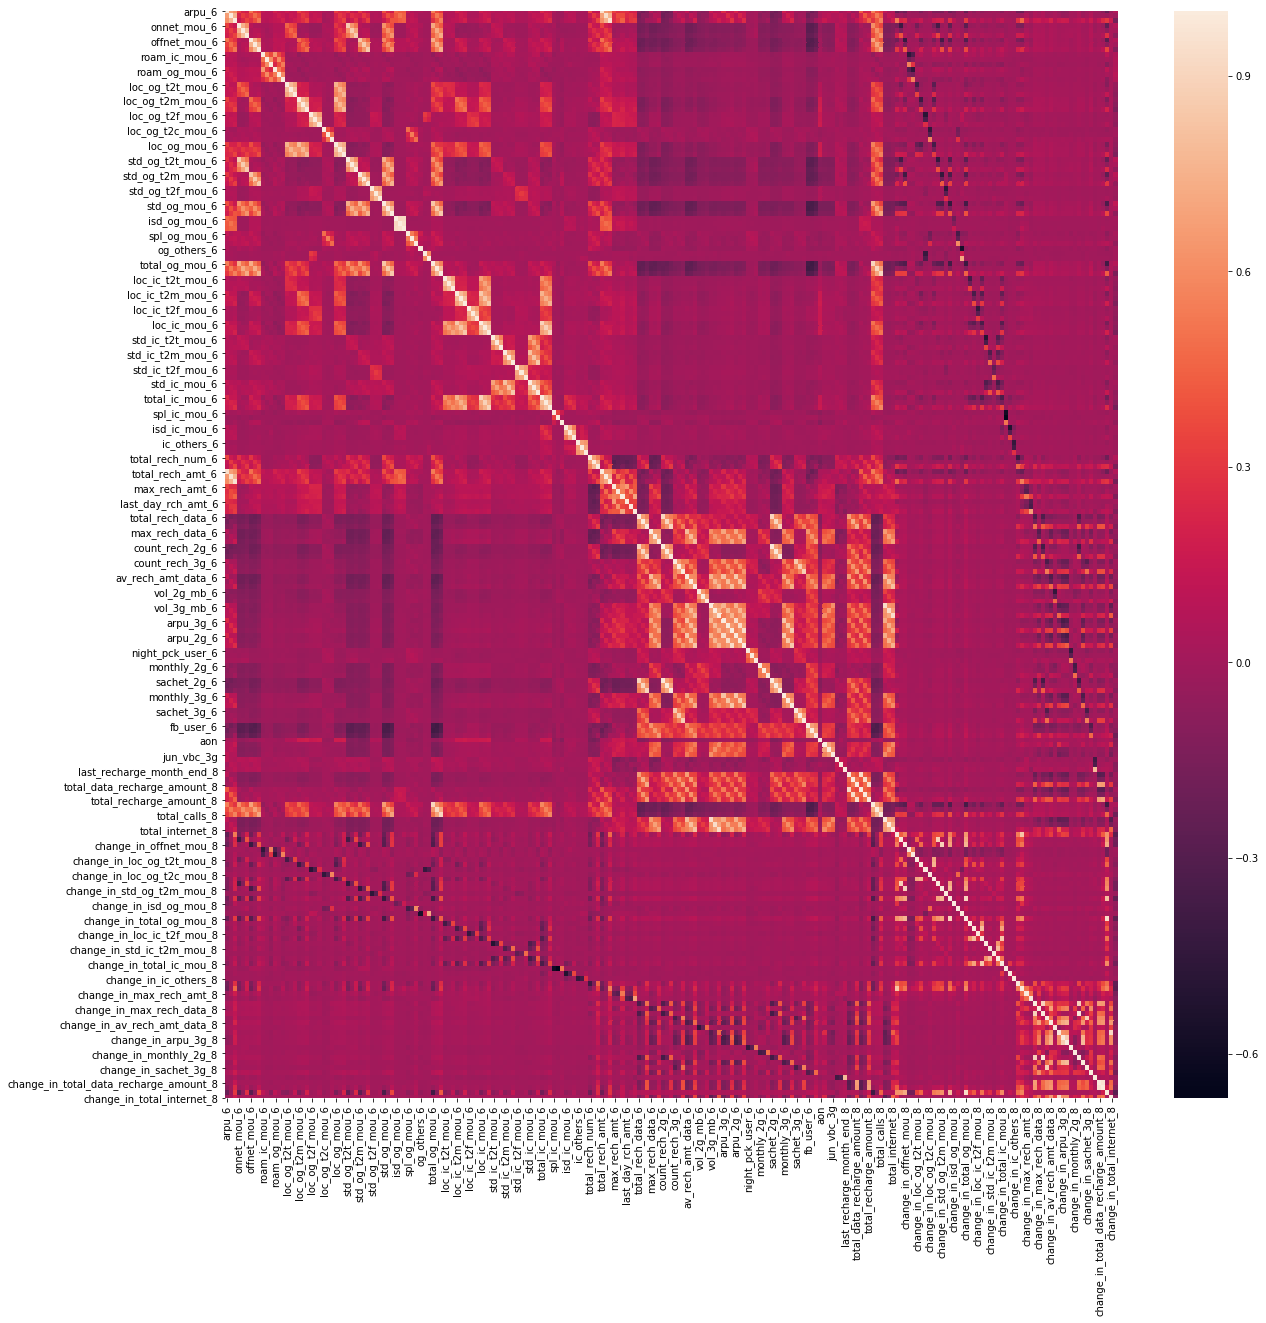

In [60]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data.corr())

In [61]:
# code to find highly corelated features 
#Identifying highly correlated varaibles
corr_matrix = data.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_corr_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
highly_corr_cols

['onnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'total_recharge_amount_6',
 'total_recharge_amount_7'

In [62]:
len(highly_corr_cols)

74

# Data Splitting 

In [54]:
# Getting all independent variables
X = data.drop(['churn'], axis = 1)
X.shape

(30001, 220)

In [55]:
# Getting the output variable
y = data['churn']    
y.shape

(30001,)

In [56]:
# Splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,change_in_monthly_2g_8,change_in_sachet_2g_8,change_in_monthly_3g_8,change_in_sachet_3g_8,change_in_fb_user_8,change_in_last_recharge_month_end_8,change_in_total_data_recharge_amount_8,change_in_total_recharge_amount_8,change_in_total_calls_8,change_in_total_internet_8
39186,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-528.5,-187.285,0.000
39833,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,...,0.0,-1.5,0.0,0.0,0.0,0.0,-320.0,-316.5,-117.320,188.975
38778,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,...,0.0,-2.5,0.0,0.0,-1.0,0.0,-195.5,-201.5,-32.025,-0.115
43026,1235.160,323.670,705.440,2383.19,165.84,697.44,469.96,200.93,555.04,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-155.0,94.630,0.000
12271,437.887,457.518,264.205,17.63,45.96,23.89,186.83,302.06,81.66,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-212.5,-154.395,-11.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40261,266.899,176.395,219.725,152.69,78.61,72.53,46.56,34.84,23.66,0.81,...,-1.0,0.5,0.0,0.5,0.0,0.0,-43.0,-182.5,-58.340,-1154.330
81456,614.983,864.362,705.591,514.54,1162.53,1045.04,510.04,733.63,559.41,156.19,...,0.0,1.0,0.0,0.0,0.0,0.0,25.0,345.0,444.335,0.000
47136,270.165,1.200,13.400,10.39,0.00,0.73,31.33,1.58,10.78,0.00,...,-0.5,-0.5,0.0,0.0,-0.5,0.0,-299.0,-493.5,27.660,-380.885
77825,1080.500,444.296,253.913,321.39,155.74,45.98,1637.99,474.08,169.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-577.0,-1159.565,0.000


In [58]:
X_test

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,change_in_monthly_2g_8,change_in_sachet_2g_8,change_in_monthly_3g_8,change_in_sachet_3g_8,change_in_fb_user_8,change_in_last_recharge_month_end_8,change_in_total_data_recharge_amount_8,change_in_total_recharge_amount_8,change_in_total_calls_8,change_in_total_internet_8
20296,539.240,537.575,281.034,15.91,5.51,7.99,54.24,14.86,22.36,0.00,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-426.5,-46.335,0.000
8279,79.431,208.200,78.834,15.88,9.33,9.46,26.61,21.34,3.56,5.76,...,0.0,-3.5,0.0,1.0,0.0,0.0,-479.5,-561.5,-40.295,-58.280
72269,716.917,721.802,625.488,347.81,227.36,232.86,819.18,809.29,870.48,0.00,...,0.0,0.0,-0.5,-1.5,-1.0,0.0,-318.0,-430.5,-6.920,-1134.595
65602,458.514,486.899,458.996,79.43,65.01,115.64,348.88,272.28,222.64,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.0,-223.980,0.000
42758,604.769,402.747,95.049,655.34,383.31,47.41,152.48,124.86,5.26,0.00,...,-1.0,-1.0,0.0,0.0,-1.0,0.0,-383.0,-865.5,-982.100,-1550.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40214,152.390,119.650,171.370,67.38,24.83,55.56,72.63,118.56,99.29,0.00,...,0.0,0.0,-0.5,0.0,0.0,0.0,-378.0,-369.0,83.425,-309.295
59799,547.625,560.868,769.329,94.54,61.96,146.98,442.43,407.84,458.28,0.00,...,-0.5,0.0,2.0,0.0,0.5,0.0,503.0,814.0,99.565,661.630
18784,744.360,770.246,765.866,129.71,66.29,63.93,440.09,433.99,668.54,0.00,...,-1.0,0.0,0.0,0.0,0.0,0.0,-462.0,-406.0,312.235,-588.410
4712,199.288,145.208,30.266,23.28,0.00,0.00,8.61,18.78,0.00,0.00,...,-1.0,-1.5,0.0,0.0,0.0,0.0,-1012.0,-1175.5,-33.245,-567.630


In [59]:
y_train

39186    0
39833    0
38778    0
43026    0
12271    0
        ..
40261    0
81456    0
47136    0
77825    0
18732    0
Name: churn, Length: 21000, dtype: int64

In [60]:
y_test

20296    1
8279     1
72269    0
65602    0
42758    1
        ..
40214    0
59799    0
18784    0
4712     0
15296    0
Name: churn, Length: 9001, dtype: int64

# Data Scaling
As we can see the attributes have very difference ranges, thus scaling will help us in bringing all the variables to a specific scale with no much differences.

In [61]:
# Rescaling the features before PCA as it is sensitive to the scales of the features

# Standar scalar
scaler = StandardScaler()

In [62]:
# fitting and transforming the scaler on train dataset
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test dataset
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

# Handling Data Class Imbalance

We are using SMOTE algorithm to handle the imbalance.

**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling**
SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

**Prerequisite for running SMOTE:**
- Install imbalanced-learn/imblearn packages

In [64]:
# Commands to install the packages: 
import sys
!{sys.executable} -m pip install imbalanced-learn

In [65]:
# Commands to install the packages: 
import sys
!{sys.executable} -m pip install imblearn

In [66]:
# Commands to install the packages: 
# !conda install -c glemaitre imbalanced-learn

In [67]:
# Checking the imbalance before over-sampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Before OverSampling, churn event rate : {}%".format(round(sum(y_train == 1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05%


In [68]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train == 1)/len(y_train)*100,2)))

After OverSampling, the shape of train_X: (38618, 220)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309 

After OverSampling, churn event rate : 50.0% 



# Principle Component Analysis - PCA

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.
As we have many features, using PCA to reduce the features.

In [69]:
pca = PCA(random_state = 42)

In [70]:
pca.fit(X_train)

PCA(random_state=42)

In [71]:
# Components from the PCA
pca.components_

array([[-8.12576371e-02, -5.30009588e-02,  1.41944726e-02, ...,
         1.91563686e-02,  1.82448544e-01, -2.48972535e-02],
       [ 7.39535207e-02,  1.29710831e-01,  1.86286301e-01, ...,
         1.08205993e-01,  1.04851989e-01,  9.98164715e-02],
       [ 1.31672234e-01,  9.01680904e-02,  1.09589517e-02, ...,
        -7.49556309e-02, -1.73657228e-01, -6.90679025e-02],
       ...,
       [-0.00000000e+00, -5.98682533e-17,  5.26093398e-16, ...,
        -8.87444655e-02,  5.99448156e-02,  8.48482220e-02],
       [-0.00000000e+00, -7.12116376e-17,  6.58865248e-16, ...,
        -4.65223664e-02,  3.67147054e-03,  1.46203459e-01],
       [ 0.00000000e+00,  2.42861287e-16, -4.33973314e-16, ...,
        -2.19340166e-02, -4.06696466e-02,  4.09752199e-03]])

In [72]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.04551396e-01, 7.43412210e-02, 6.12513105e-02, 4.52312351e-02,
       4.05269073e-02, 3.92809097e-02, 3.07747204e-02, 2.85258722e-02,
       2.33361863e-02, 2.25377029e-02, 2.03541405e-02, 1.99064409e-02,
       1.76156644e-02, 1.66327765e-02, 1.60153179e-02, 1.57440073e-02,
       1.44663933e-02, 1.38993985e-02, 1.20383898e-02, 1.17512915e-02,
       1.16834357e-02, 1.13021769e-02, 1.07082772e-02, 1.04539199e-02,
       1.01383401e-02, 9.76997852e-03, 9.53184784e-03, 8.74906940e-03,
       8.67320600e-03, 8.51089714e-03, 8.23913537e-03, 8.02021266e-03,
       7.81045203e-03, 7.69549031e-03, 7.60026905e-03, 7.40346418e-03,
       7.07282783e-03, 6.84802613e-03, 6.60251439e-03, 6.44930373e-03,
       6.27578972e-03, 6.05244731e-03, 5.93802769e-03, 5.80455161e-03,
       5.63461947e-03, 5.46553625e-03, 5.34430157e-03, 5.22256303e-03,
       5.14443954e-03, 5.03735944e-03, 5.01299652e-03, 4.76912393e-03,
       4.67225657e-03, 4.58805402e-03, 4.47379792e-03, 4.40476414e-03,
      

In [73]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [74]:
var_cumu

array([0.1045514 , 0.17889262, 0.24014393, 0.28537516, 0.32590207,
       0.36518298, 0.3959577 , 0.42448357, 0.44781976, 0.47035746,
       0.4907116 , 0.51061804, 0.52823371, 0.54486648, 0.5608818 ,
       0.57662581, 0.5910922 , 0.6049916 , 0.61702999, 0.62878128,
       0.64046472, 0.65176689, 0.66247517, 0.67292909, 0.68306743,
       0.69283741, 0.70236926, 0.71111833, 0.71979153, 0.72830243,
       0.73654157, 0.74456178, 0.75237223, 0.76006772, 0.76766799,
       0.77507145, 0.78214428, 0.78899231, 0.79559482, 0.80204413,
       0.80831992, 0.81437236, 0.82031039, 0.82611494, 0.83174956,
       0.8372151 , 0.8425594 , 0.84778196, 0.8529264 , 0.85796376,
       0.86297676, 0.86774588, 0.87241814, 0.87700619, 0.88147999,
       0.88588475, 0.89011766, 0.89417686, 0.89808359, 0.90189382,
       0.90561053, 0.90930316, 0.91287234, 0.91642528, 0.91989744,
       0.92332955, 0.92664423, 0.92986144, 0.93300813, 0.93602553,
       0.938994  , 0.94184784, 0.9446278 , 0.94729204, 0.94979

In [75]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       10.46
1       17.89
2       24.01
3       28.54
4       32.59
        ...  
215    100.00
216    100.00
217    100.00
218    100.00
219    100.00
Length: 220, dtype: float64


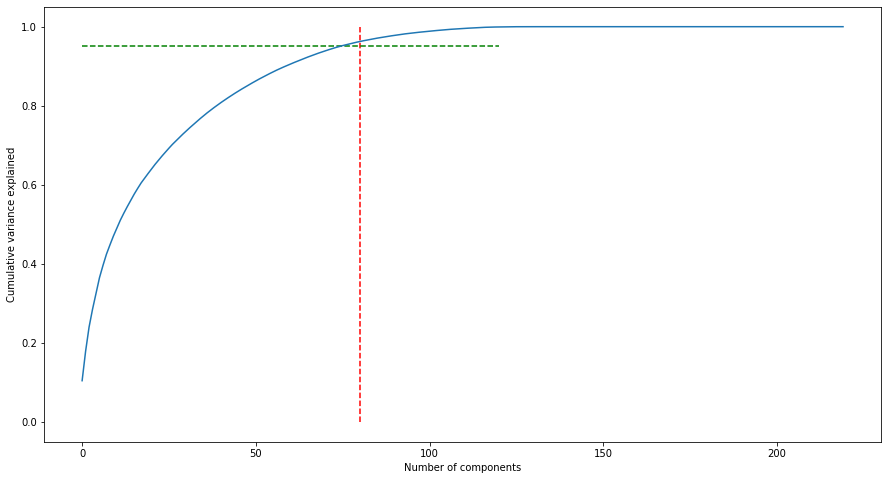

In [76]:
fig = plt.figure(figsize = [15, 8])
plt.vlines(x = 80, ymax = 1, ymin = 0, colors = 'r', linestyles = '--')
plt.hlines(y = 0.95, xmax = 120, xmin = 0, colors = 'g', linestyles = '--')
plt.plot(var_cumu)
plt.xlabel('Number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

From the above plot we can observe that 95% if the variance in the dataset can be explained by 80 features. 

Using incremental PCA efficiency - saves a lot of time on larger datasets

In [77]:
pca_final = IncrementalPCA(n_components = 80)

In [78]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(38618, 80)

In [79]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

In [80]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())

print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.02973210782588789 , min corr:  -0.03433114673070849


We can see that correlations are very close to 0, thus we can assume that there are no correlations between the components.

In [81]:
# Applying selected components to the test data - 80 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 80)

# Data Modelling

We are using three different models for comparison.
- Logistic Regression 
- Random Forest 
- XGBoost 

# 1. Logistic Regression:
Applying logistic regression on the data on our Principal components.

### Methods for easy calulations

In [82]:
# Method to get evaluation metrics
def getModelEvaluationMetrics(actual_churn = False, pred_churn = False):

    # Getting the confusion matrix
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # ROC
    print("ROC - Area under the Curve Score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    
    # Sensitivity or Recall
    print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
    
    # Specificity
    print('Specificity: {}'.format(TN / float(TN + FP)))
    
    # False Positive Rate - Predicting churn when customer has not churned
    print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
    
    # Positive Predictive Rate
    print('Positive predictive value: {}'.format(TP / float(TP + FP)))
    
    # Negative predictive Rate
    print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
    
    # sklearn Precision score value
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [83]:
# Method to Predict Churnng with probabilities using input probability cut-off
def predictChurnWithProbability(model, X, y, prob):
    
    # predictiong
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df = pd.DataFrame({'churn': y, 'churn_prob': pred_probs})
    
    # Creating a new column 'predicted' with 1 if churn_prob > 0.5 else 0
    y_df['final_predicted'] = y_df.churn_prob.map( lambda x: 1 if x > prob else 0)
    
    getModelEvaluationMetrics(y_df.churn, y_df.final_predicted)
    return y_df

In [84]:
# Method to find optimal cutoff for classifying as churn or non-churn
def findOptimalCutoff(df, cutoff = 0):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_prob.map( lambda x: 1 if x > i else 0)
    
    # Calculate accuracy, sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        # Getting confusion matrix
        cm = metrics.confusion_matrix(df.churn, df[i] )
        total = sum(sum(cm))
        # Calulating Accuracy
        accuracy = (cm[0,0] + cm[1,1]) / total
        # Calulating Specificity 
        speci = cm[0,0] / (cm[0,0] + cm[0,1])
        # Calculating Sensitivity
        sensi = cm[1,1] / (cm[1,0] + cm[1,1])
        cutoff_df.loc[i] =[i ,accuracy, sensi, speci]
        
    print(cutoff_df)
    
    # Plotting Evaluation metrics for various Probabilities
    cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
    plt.vlines(x = cutoff, ymax = 1, ymin = 0, colors = 'r', linestyles = '--')
    plt.show()

In [85]:
# Method to Plot ROC Curve
def plotROCCurve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize = (15, 8))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc = "lower right")
    plt.show()
    
    return fpr, tpr, thresholds

In [86]:
# Model fitting
def modelfit(model, X_train, y_train, performCV = True, cv_folds = 3):
    # Fit the model on the data
    model.fit(X_train, y_train)
        
    # Predict training set:
    dtrain_predictions = model.predict(X_train)
    dtrain_predprob = model.predict_proba(X_train)[:,1]
    
    # Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(model, X_train, y_train, cv = cv_folds, scoring = 'roc_auc')
    
    # Plotting Model Evaluation metrics
    print ("\nModel Evaluation Metrics:")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Sensitivity/Recall : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("ROC-AUC (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

In [96]:
# Training the model on the train data
lr0 = LogisticRegression(class_weight = 'balanced')

In [97]:
# Training Data
modelfit(lr0, X_train_pca, y_train)


Model Evaluation Metrics:
Accuracy : 0.8422
Sensitivity/Recall : 0.862
ROC-AUC (Train): 0.910454
CV Score : Mean - 0.9092424 | Std - 0.004737379 | Min - 0.9037649 | Max - 0.9153221


From the above scores, we obtained: (Train)
- Train Accuracy - 84.2%
- Sensitivity/Recall - 86.2%
- ROC Area under the curve (Train) - 0.91

In [98]:
# Predictions on Test data
predicted_test = lr0.predict(X_test_pca)
getModelEvaluationMetrics(y_test, predicted_test)

ROC - Area under the Curve Score : 0.8243738536743022
Sensitivity/Recall : 0.8173333333333334
Specificity: 0.8314143740152709
False Positive Rate: 0.16858562598472912
Positive predictive value: 0.3058882235528942
Negative Predictive value: 0.9804201800771759
sklearn precision score value: 0.3058882235528942


In [99]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test, predicted_test)))
print("Recall : {}".format(metrics.recall_score(y_test, predicted_test)))
print("Precision : {}".format(metrics.precision_score(y_test, predicted_test)))

Accuracy : 0.830241084323964
Recall : 0.8173333333333334
Precision : 0.3058882235528942


From the above scores, we obtained: (Test)
- Test Accuracy - 83.0%
- Sensitivity/Recall - 81.7%
- ROC Area under the curve (Test) - 0.82

Finding the optimal cut-off point is very much important because sensitivity metrics for churn prediction need to taken into care. A trade-off between sensitivity and specificity is to be considered. Then we need to adjust the probability threshold which will lead us to high value for sensitivity rate.

In [100]:
# Setting the initial cut-off to 0.5
cut_off_prob = 0.5
y_train_lr = predictChurnWithProbability(lr0, X_train_pca, y_train, cut_off_prob)
y_train_lr.head()

ROC - Area under the Curve Score : 0.8422238334455435
Sensitivity/Recall : 0.8619814594230669
Specificity: 0.8224662074680201
False Positive Rate: 0.1775337925319799
Positive predictive value: 0.829214826624153
Negative Predictive value: 0.8563032459829613
sklearn precision score value: 0.829214826624153


,churn,churn_prob,final_predicted
0,0,0.459739,0
1,0,0.048919,0
2,0,0.275245,0
3,0,0.000020,0
4,0,0.035414,0


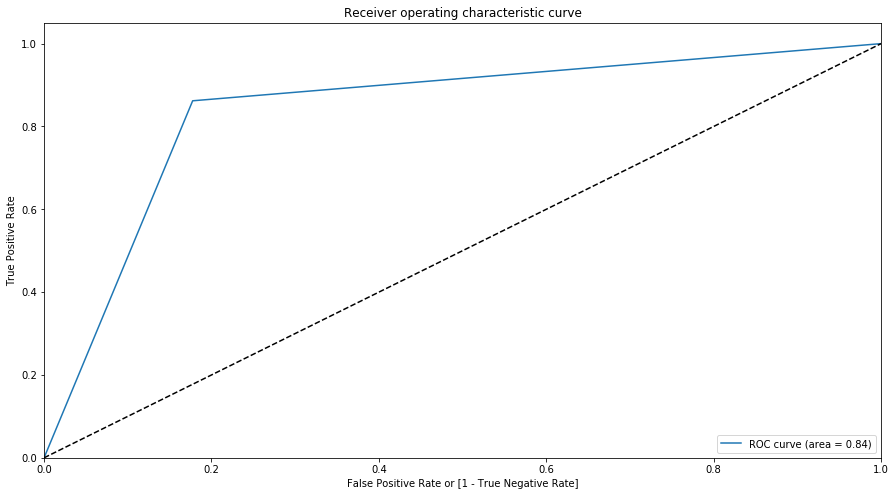

(array([0.        , 0.17753379, 1.        ]),
 array([0.        , 0.86198146, 1.        ]),
 array([2, 1, 0]))

In [101]:
# Plotting the ROC Curve
# It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
plotROCCurve(y_train_lr.churn, y_train_lr.final_predicted)

The ROC curve is lying in the top left corner which is a sign of a good fit. 

Plotting the trade-off between sensitivity vs specificity for findign optimal cut-off

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.709540  0.974468  0.444611
0.2   0.2  0.771195  0.952665  0.589725
0.3   0.3  0.809156  0.931483  0.686830
0.4   0.4  0.832979  0.904759  0.761199
0.5   0.5  0.842224  0.861981  0.822466
0.6   0.6  0.839168  0.807706  0.870630
0.7   0.7  0.828681  0.744471  0.912890
0.8   0.8  0.791574  0.637319  0.945828
0.9   0.9  0.638252  0.298099  0.978404


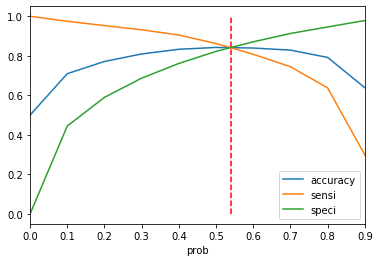

In [102]:
findOptimalCutoff(y_train_lr, 0.54)

From the above graph we can conclude that 0.54 is the optimum cut-off value.

In [103]:
# Predicting with the choosen cut-off on training data
cut_off_prob = 0.54
y_train_lr = predictChurnWithProbability(lr0, X_train_pca, y_train, cut_off_prob)

ROC - Area under the Curve Score : 0.8420943601429385
Sensitivity/Recall : 0.8407996271168885
Specificity: 0.8433890931689886
False Positive Rate: 0.15661090683101145
Positive predictive value: 0.8429825016875228
Negative Predictive value: 0.8412108063433028
sklearn precision score value: 0.8429825016875228


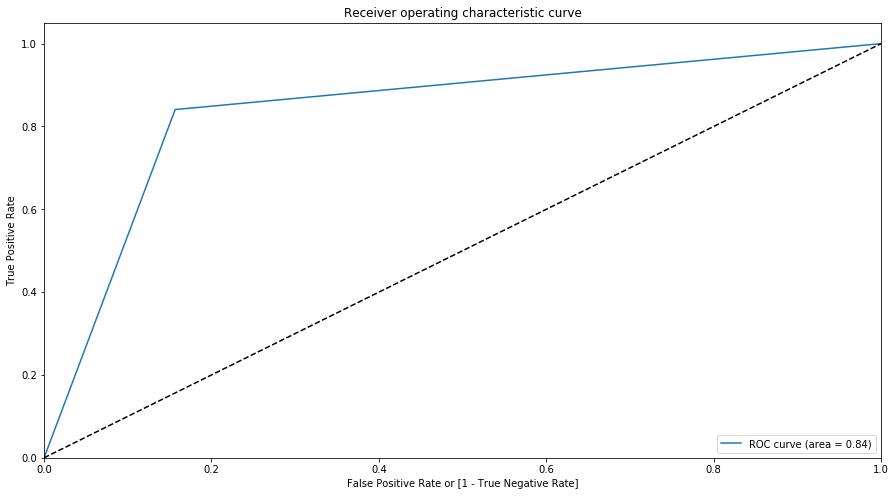

(array([0.        , 0.15661091, 1.        ]),
 array([0.        , 0.84079963, 1.        ]),
 array([2, 1, 0]))

In [104]:
plotROCCurve(y_train_lr.churn, y_train_lr.final_predicted)

In [105]:
# Predicting with the choosen cut-off on test data
y_test_lr = predictChurnWithProbability(lr0, X_test_pca, y_test, cut_off_prob)

ROC - Area under the Curve Score : 0.8266150365612249
Sensitivity/Recall : 0.8013333333333333
Specificity: 0.8518967397891165
False Positive Rate: 0.14810326021088352
Positive predictive value: 0.3296763576522216
Negative Predictive value: 0.9792421287266648
sklearn precision score value: 0.3296763576522216


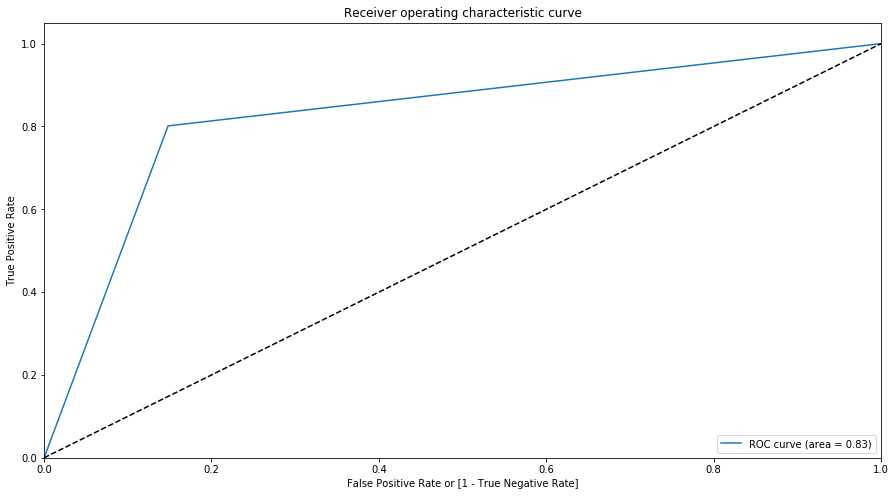

(array([0.        , 0.14810326, 1.        ]),
 array([0.        , 0.80133333, 1.        ]),
 array([2, 1, 0]))

In [106]:
plotROCCurve(y_test_lr.churn, y_test_lr.final_predicted)

The result model (Logistic Regression with PCA components) with optimal cut-off threshold as 0.54 has a good balance between sensitivity and specificity on training and testing data.

Below are the evaluation metrics for Logistic Regression:

| Data | Sensitivity | Specificity | ROC - Area under curve |
| --- | --- | --- | --- |
| Train | <font color = 'red'>**84.1%**</font> | **84.3%** | **0.84** |
| Test | <font color = 'red'>**80.1%**</font> | **85.2%** | **0.83** | 

# 2. Random Forest:

In [107]:
# Running the random forest with default parameters initially.
rfc = RandomForestClassifier()

In [108]:
# fitting the random forest on training data
rfc.fit(X_train_pca, y_train)

RandomForestClassifier()

In [109]:
# Making predictions for test data
predictions = rfc.predict(X_test_pca)

In [110]:
# Checking the evaluation metric scores for the default Random Forest
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8251
           1       0.50      0.52      0.51       750

    accuracy                           0.92      9001
   macro avg       0.73      0.73      0.73      9001
weighted avg       0.92      0.92      0.92      9001



In [111]:
# Printing confusion matrix
confusion_matrix(y_test, predictions)

array([[7870,  381],
       [ 363,  387]])

In [112]:
accuracy_score(y_test,predictions)

0.9173425174980557

We can still optimize the Random Forest by tuning the hyperparameters to improve model performance.

# Hyperparameter tuning
The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [113]:
# Initializing some common variables.
n_folds = 3

In [114]:
# Method to fit the random forest
def fitRandomForest(parameters):
    # instantiate the model
    rf = RandomForestClassifier()
    
    # fit tree on training data
    # considering scoring as 'f1' as it takes into consideration of averaging precisiona nd recall
    rf = RandomizedSearchCV(rf, param_distributions = parameters, cv = n_folds, scoring = 'f1', return_train_score = True, verbose = 1)
    rf.fit(X_train_pca, y_train)
    
    # Obtaining best parameters
    print(rf.best_params_)
    
    # scores of RandomSearch CV
    scores = rf.cv_results_
    print(pd.DataFrame(scores).head())
    
    return scores

In [115]:
# Method to plot the parameter changes with train and test accuracies
def plotParameterChange(parameter, scores):
    plt.figure()
    plt.plot(scores[parameter], scores['mean_train_score'], label = 'Train accuracy')
    plt.plot(scores[parameter], scores['mean_test_score'], label = 'Test accuracy')
    plt.xlabel(parameter)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Tuning max_depth
Finding the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [116]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 10)}

scores = fitRandomForest(parameters)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   52.4s finished


{'max_depth': 12}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.149451      0.005619         0.066957        0.002678   
1      13.710875      0.035951         0.137711        0.000811   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.791221           0.815351   
1              12  {'max_depth': 12}           0.913070           0.924205   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.807077         0.804550        0.010012                2   
1           0.913053         0.916776        0.005253                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.806572            0.805478            0.809795   
1            0.956674            0.956562            0.955936   

   mean_train_score  std_train_score  
0          0.807282         0.001832  
1          0.956391         0.000325  


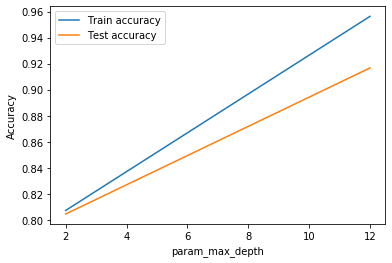

In [117]:
plotParameterChange('param_max_depth', scores)

From the above plot we can observe that train and test accuracies increased and the model is tending to overfit with increase in max_depth. Thus selecting a less value for depth approx to 6.

### Tuning n_estimators
Finding the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy of the ensemble.

In [118]:
# parameters to build the model on
parameters = {'n_estimators': range(50, 300, 100)}

scores = fitRandomForest(parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.3min finished


{'n_estimators': 250}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.396212      0.048040         0.098430        0.007800   
1      28.443806      0.187336         0.270943        0.002838   
2      46.607017      0.543731         0.463044        0.024980   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.949392   
1                150  {'n_estimators': 150}           0.951659   
2                250  {'n_estimators': 250}           0.952687   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.955501           0.948867         0.951254        0.003011   
1           0.957986           0.948839         0.952828        0.003824   
2           0.958678           0.949176         0.953514        0.003923   

   rank_test_score  split0_train_score  split1_train_score  \
0                3                 1.0                 1.0   
1              

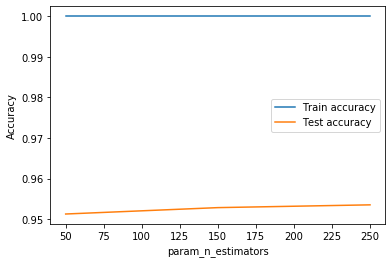

In [119]:
plotParameterChange('param_n_estimators', scores)

The test accuracy is increasing until we have 150 estimators and it's being constant and decreasing. Thus choosing 150 as optimal n_estimator value

### Tuning max_features
Finding the optimum values for max_features and understand how the value of max_features impacts the overall accuracy of the ensemble.

In [120]:
# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25, 30]}

scores = fitRandomForest(parameters)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 13.7min finished


{'max_features': 5}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.017492      0.216136         0.190241        0.008771   
1      23.224512      0.673812         0.183833        0.007573   
2      37.621304      0.709697         0.197292        0.008133   
3      53.749913      1.494556         0.198205        0.005244   
4      64.472729      1.859173         0.192141        0.014145   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.953053   
1                 10  {'max_features': 10}           0.953103   
2                 15  {'max_features': 15}           0.949510   
3                 20  {'max_features': 20}           0.949238   
4                 25  {'max_features': 25}           0.948221   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.957576           0.949950         0.953526        0.003131   
1           0.955503           0.9

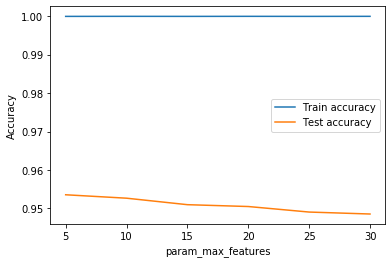

In [121]:
plotParameterChange('param_max_features', scores)

### Tuning min_samples_leaf
Finding the optimum values for min_samples_leaf and understand how the value of min_samples_leaf impacts the overall accuracy of the ensemble.

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [122]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 100)}

scores = fitRandomForest(parameters)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.7min finished


{'min_samples_leaf': 50}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.853102      0.142664         0.127440        0.002745   
1      11.031857      0.788205         0.117812        0.008792   
2       9.969690      0.204930         0.113161        0.010339   
3       9.874263      1.210674         0.114226        0.021592   
4       8.253352      0.479615         0.096449        0.005435   

  param_min_samples_leaf                     params  split0_test_score  \
0                     50   {'min_samples_leaf': 50}           0.858375   
1                    150  {'min_samples_leaf': 150}           0.831246   
2                    250  {'min_samples_leaf': 250}           0.823663   
3                    350  {'min_samples_leaf': 350}           0.815937   
4                    450  {'min_samples_leaf': 450}           0.804325   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.874103           0.867521         0.8

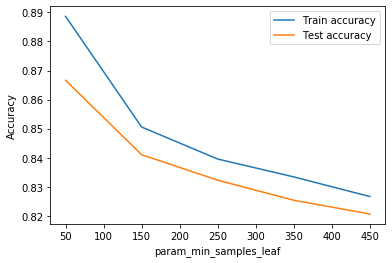

In [123]:
plotParameterChange('param_min_samples_leaf', scores)

### Tuning min_samples_split
Finding the optimum values for min_samples_split and understand how the value of min_samples_split impacts the overall accuracy of the ensemble.

In [124]:
# parameters to build the model on
parameters = {'min_samples_split': range(50, 500, 100)}

scores = fitRandomForest(parameters)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.0min finished


{'min_samples_split': 50}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.143943      0.542745         0.162735        0.003892   
1      16.574547      0.415580         0.145156        0.006632   
2      15.452511      0.270743         0.122441        0.000291   
3      14.496583      0.283825         0.126420        0.014529   
4      13.753938      0.116902         0.111510        0.004782   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.902339   
1                     150  {'min_samples_split': 150}           0.865126   
2                     250  {'min_samples_split': 250}           0.848917   
3                     350  {'min_samples_split': 350}           0.841959   
4                     450  {'min_samples_split': 450}           0.836058   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920818           0.90837

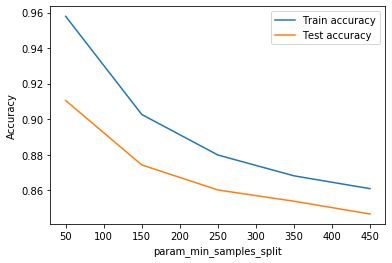

In [125]:
plotParameterChange('param_min_samples_split', scores)

## Random Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using RandomizedSearchCV as we know the behavior in ranges with random search also as we have comparatively larger feature space.

In [126]:
# Create the parameter grid based on the results of random search 
param_distributions = {
    'max_depth': [4, 6, 8, 10, 12],
    'n_estimators': [100, 150, 200],
    'max_features': [5, 10, 15, 20],
    'min_samples_leaf': range(50, 300, 100),
    'min_samples_split': range(50, 300, 100),
    'criterion': ['entropy', 'gini']
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
random_search = RandomizedSearchCV(rf, param_distributions = param_distributions, cv = n_folds, verbose = 1)

# Fit the grid search to the data
random_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': range(50, 300, 100),
                                        'min_samples_split': range(50, 300, 100),
                                        'n_estimators': [100, 150, 200]},
                   verbose=1)

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ', random_search.best_score_,' using ', random_search.best_params_)

We can get accuracy of  0.8645968561638422  using  {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 10, 'criterion': 'gini'}


### Fitting the final model with the best parameters obtained from random search.
### Add the best param values

In [128]:
# Create a model
rfc = RandomForestClassifier(bootstrap = True, max_depth = 10, n_estimators = 100, max_features = 5, min_samples_leaf = 50, min_samples_split = 50, criterion = 'gini')
# Fit the model 
modelfit(rfc, X_train_pca, y_train)


Model Evaluation Metrics:
Accuracy : 0.8812
Sensitivity/Recall : 0.8719
ROC-AUC (Train): 0.951989
CV Score : Mean - 0.9354999 | Std - 0.006134097 | Min - 0.9283134 | Max - 0.9433011


In [129]:
# Making predictions using Test Data
predictions = rfc.predict(X_test_pca)

In [130]:
# Getting the evaluation metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8251
           1       0.35      0.71      0.47       750

    accuracy                           0.87      9001
   macro avg       0.66      0.80      0.70      9001
weighted avg       0.92      0.87      0.89      9001



In [131]:
# Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[7274  977]
 [ 214  536]]


In [132]:
# Model evaluation on Test data
getModelEvaluationMetrics(y_test, predictions)

ROC - Area under the Curve Score : 0.7981283884781643
Sensitivity/Recall : 0.7146666666666667
Specificity: 0.8815901102896618
False Positive Rate: 0.11840988971033814
Positive predictive value: 0.35426305353602117
Negative Predictive value: 0.9714209401709402
sklearn precision score value: 0.35426305353602117


In [133]:
# Let's see if we can achive a better Recall rate by Deciding an optimal cut-off for the model to predict churn.
# Setting the initial cut-off to 0.5
cut_off_prob = 0.5
y_train_rf = predictChurnWithProbability(rfc, X_train_pca, y_train, cut_off_prob)
y_train_rf.head()

ROC - Area under the Curve Score : 0.8811952975296494
Sensitivity/Recall : 0.8719250090631312
Specificity: 0.8904655859961675
False Positive Rate: 0.1095344140038324
Positive predictive value: 0.8883963906917841
Negative Predictive value: 0.8742563685361265
sklearn precision score value: 0.8883963906917841


,churn,churn_prob,final_predicted
0,0,0.410281,0
1,0,0.144327,0
2,0,0.389864,0
3,0,0.243426,0
4,0,0.149970,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.513284  1.000000  0.026568
0.2   0.2  0.647677  1.000000  0.295354
0.3   0.3  0.801958  0.992542  0.611373
0.4   0.4  0.873038  0.949039  0.797038
0.5   0.5  0.881195  0.871925  0.890466
0.6   0.6  0.855663  0.771298  0.940028
0.7   0.7  0.787508  0.603242  0.971775
0.8   0.8  0.645140  0.299394  0.990885
0.9   0.9  0.513776  0.027759  0.999793


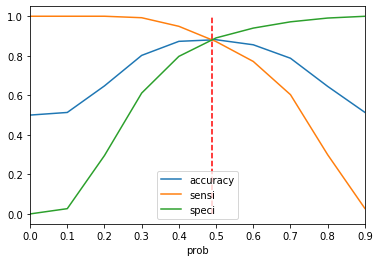

In [135]:
findOptimalCutoff(y_train_rf, 0.49)

From the above graph we can conclude that 0.49 is the optimum cut-off value.

In [136]:
# Predicting with the choosen cut-off on training data
cut_off_prob = 0.49
y_train_rf = predictChurnWithProbability(rfc, X_train_pca, y_train, cut_off_prob)

ROC - Area under the Curve Score : 0.8825159252162205
Sensitivity/Recall : 0.8805220363561034
Specificity: 0.8845098140763374
False Positive Rate: 0.11549018592366254
Positive predictive value: 0.8840474209650583
Negative Predictive value: 0.8809965954812752
sklearn precision score value: 0.8840474209650583


In [137]:
# Predicting with the choosen cut-off on test data
y_test_rf = predictChurnWithProbability(rfc, X_test_pca, y_test, cut_off_prob)

ROC - Area under the Curve Score : 0.7995227245182401
Sensitivity/Recall : 0.724
Specificity: 0.8750454490364804
False Positive Rate: 0.12495455096351957
Positive predictive value: 0.34498094027954257
Negative Predictive value: 0.9721287195368251
sklearn precision score value: 0.34498094027954257


The result model (Random Forest with PCA components) with optimal cut-off threshold as 0.54 has a good balance between sensitivity and specificity on training and testing data.

Below are the evaluation metrics for Random Forest:

| Data | Sensitivity | Specificity | ROC - Area under curve |
| --- | --- | --- | --- |
| Train | <font color = 'red'>**88.0%**</font> | **88.4%** | **0.88** |
| Test | <font color = 'red'>**72.4%**</font> | **87.5%** | **0.80** |

# 3. XGBoost:
**Prerequisite for running XGBoost:**
- Install xgboost

In [ ]:
# # Commands to install the packages: 
# import sys
# !{sys.executable} -m pip install xgboost

In [87]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate = 0.1, n_estimators = 1000, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 5, scale_pos_weight = 1, seed = 27)

In [88]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train)


Model Evaluation Metrics:
Accuracy : 1
Sensitivity/Recall : 1
ROC-AUC (Train): 1.000000
CV Score : Mean - 0.9915004 | Std - 0.001329562 | Min - 0.9896294 | Max - 0.9925972


From the above where 

Accuracy : 1

Sensitivity/Recall : 1

ROC-AUC (Train): 1.000000
    
With this we can get to the conclusion that the model is overfitting so avoid it we need to tune the parameter.

Tunning max_depth nd min_child_weight

Max_depth : what should be the maximum tree depth for base learners
    
min_child_weight :Minimum sum of instance weight needed in a child.

In [90]:
# Hyperparameter tunning for the XGBClassifer
# Tunning the max_depth and min_child_weight
param_test1 = {'max_depth' : range(3, 10, 2), 'min_child_weight' : range(1, 6, 2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 5, scale_pos_weight = 1, seed = 27), param_grid = param_test1, scoring = 'f1', n_jobs = 5, cv = 3)
gsearch1.fit(X_train_pca, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     nthread=5, seed=27, subsample=0.8),
             n_jobs=5,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='f1')

In [91]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9524181585819319)

In [92]:
print("1")

1


Using Gridsearch Cv we had tunned max_depth and min_child_weight.

The best tunning value we got is 

__'max_depth': 9, 'min_child_weight': 1__

Now we will try to tune the gamma

In [93]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma': [i / 10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 9, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 5, scale_pos_weight = 1, seed = 27), param_grid = param_test2, scoring = 'f1', n_jobs = 5, cv = 3)
gsearch2.fit(X_train_pca, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=9,
                                     n_estimators=140, nthread=5, seed=27,
                                     subsample=0.8),
             n_jobs=5, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='f1')

In [94]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.9581782621749259)

After tunning the hyperprameter __gamma__ with tha range of value.

The best tunning value we got is 

__gamma: 0.1__

In [95]:
# Final XGBClassifier
xgb2 = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth = 9, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 10, scale_pos_weight = 1, seed = 27)

In [97]:
# Model fit and performance on Train data
modelfit(xgb2, X_train_pca, y_train)


Model Evaluation Metrics:
Accuracy : 0.9996
Sensitivity/Recall : 1
ROC-AUC (Train): 1.000000
CV Score : Mean - 0.9903498 | Std - 0.001317392 | Min - 0.9885221 | Max - 0.9915765


In [99]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [101]:
# Model evaluation on Test data
getModelEvaluationMetrics(y_test, dtest_predictions)

ROC - Area under the Curve Score : 0.7775791217226194
Sensitivity/Recall : 0.6106666666666667
Specificity: 0.9444915767785723
False Positive Rate: 0.055508423221427704
Positive predictive value: 0.5
Negative Predictive value: 0.9638837353123068
sklearn precision score value: 0.5


In [102]:
# Let's see if we can achive a better Recall rate by Deciding an optimal cut-off for the model to predict churn.
# Setting the initial cut-off to 0.5
cut_off_prob = 0.5
y_train_xg = predictChurnWithProbability(xgb2, X_train_pca, y_train, cut_off_prob)
y_train_xg.head()

ROC - Area under the Curve Score : 0.999559790771143
Sensitivity/Recall : 1.0
Specificity: 0.999119581542286
False Positive Rate: 0.0008804184577140194
Positive predictive value: 0.9991203559971024
Negative Predictive value: 1.0
sklearn precision score value: 0.9991203559971024


,churn,churn_prob,final_predicted
0,0,0.015142,0
1,0,0.003441,0
2,0,0.000969,0
3,0,0.003473,0
4,0,0.003132,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.973458  1.000000  0.946916
0.2   0.2  0.992491  1.000000  0.984981
0.3   0.3  0.997229  1.000000  0.994459
0.4   0.4  0.998990  1.000000  0.997980
0.5   0.5  0.999560  1.000000  0.999120
0.6   0.6  0.999767  1.000000  0.999534
0.7   0.7  0.999896  0.999948  0.999845
0.8   0.8  0.999171  0.998343  1.000000
0.9   0.9  0.991558  0.983117  1.000000


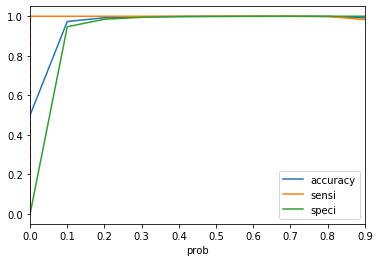

In [106]:
# Lets plot the accuracy, Sensitivity and Specificity to find the best cut off point
findOptimalCutoff(y_train_xg)

From the above graph we can conclude that 0.25 is the optimum cut-off value.

In [107]:
# Predicting with the choosen cut-off on training data
cut_off_prob = 0.25
y_train_xg = predictChurnWithProbability(xgb2, X_train_pca, y_train, cut_off_prob)

ROC - Area under the Curve Score : 0.9955202237298669
Sensitivity/Recall : 1.0
Specificity: 0.9910404474597339
False Positive Rate: 0.008959552540266197
Positive predictive value: 0.9911200082127092
Negative Predictive value: 1.0
sklearn precision score value: 0.9911200082127092


In [108]:
# Predicting with the choosen cut-off on test data
y_test_xg = predictChurnWithProbability(xgb2, X_test_pca, y_test, cut_off_prob)

ROC - Area under the Curve Score : 0.8072783904981214
Sensitivity/Recall : 0.708
Specificity: 0.9065567809962429
False Positive Rate: 0.09344321900375711
Positive predictive value: 0.4078341013824885
Negative Predictive value: 0.9715547473697883
sklearn precision score value: 0.4078341013824885


The result model (XGBoost with PCA components) with optimal cut-off threshold as 0.25 has a good balance between sensitivity and specificity on training and testing data.

Below are the evaluation metrics for XGBoost:

| Data | Sensitivity | Specificity | ROC - Area under curve | 
| --- | --- | --- | --- |
| Train | <font color = 'red'>**100%**</font> | **99.1%** | **0.99** | 
| Test | <font color = 'red'>**70.8%**</font> | **90.6%** | **0.81** |

# Model Comparisions:

| Model | Sensitivity (Train/Test) | Specificity (Train/Test) | ROC - Area under curve (Train/Test) | 
| --- | --- | --- | --- |
| Logistic Regression | <font color = 'red'>**84.1%**</font> / <font color='red'>**80.1%**</font> | **84.3% / 85.2%** | **0.84 / 0.83** |
| Random Forest | **88.0% / 72.4%** | **88.4% / 87.5%** | **0.88 / 0.80** |
| XGBoost | **100% / 70.8%** | **99.1% / 90.6%** | **0.99 / 0.81** |

Among all the three models, Logistic Regression is giving us better results with good Sensitivity/Recall values.

# Feature Selection:
Using Decision Tree algorithm to obtain the most important features which contribute to user churning.

The above models will only be able to achieve one of the two goals - to predict customers who will churn. We can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, building another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn.

In [138]:
# Building a default model
dt_default = DecisionTreeClassifier()

# Fitting the model on training data
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

In [140]:
# Checking the evaluation metric scores for the default Random Forest
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      8251
           1       0.38      0.58      0.46       750

    accuracy                           0.89      9001
   macro avg       0.67      0.75      0.70      9001
weighted avg       0.91      0.89      0.90      9001



In [141]:
# Printing confusion matrix
confusion_matrix(y_test, y_pred_default)

array([[7544,  707],
       [ 313,  437]])

In [142]:
accuracy_score(y_test, y_pred_default)

0.8866792578602377

We can still optimize the Decision Tree by tuning the hyperparameters to improve model performance.

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>

Here we are using RandomSearchCV,
A grid search scheme consists of:
- an estimator (classifier such as SVC() or decision tree)
- a parameter distributions
- a method for searching or sampling candidates (optional) 
- a cross-validation scheme, and
- a score function (accuracy, roc_auc etc.)

In [143]:
# Method to fit the Decision Tree
def fitDecisionTree(parameters):
    # instantiate the model
    dtree = DecisionTreeClassifier(random_state = 100)
    
    # fit tree on training data
    # considering scoring as 'f1' as it takes into consideration of averaging precisiona nd recall
    dtree = RandomizedSearchCV(dtree, param_distributions = parameters, cv = n_folds, scoring = 'f1', return_train_score = True,  verbose = 1)
    dtree.fit(X_train, y_train)
    
    # Obtaining best parameters
    print(dtree.best_params_)
    
    # scores of RandomSearch CV
    scores = dtree.cv_results_
    print(pd.DataFrame(scores).head())
    
    return scores

### Tuning max_depth
Finding the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [144]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

scores = fitDecisionTree(parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   30.1s finished


{'max_depth': 17}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.614187      0.032899         0.013737        0.000967   
1       1.966295      0.021570         0.013919        0.000185   
2       3.137509      0.064563         0.014197        0.000290   
3       4.147842      0.037001         0.014753        0.000172   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.833662           0.840797   
1               7   {'max_depth': 7}           0.891169           0.906836   
2              12  {'max_depth': 12}           0.905460           0.928701   
3              17  {'max_depth': 17}           0.907344           0.928485   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.835906         0.836788        0.002979                4   
1           0.912475         0.903494        0.009014                3   
2           0.928696         0.92

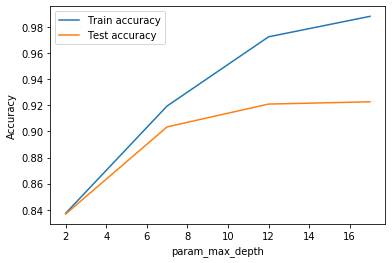

In [145]:
plotParameterChange('param_max_depth', scores)

From the above plot we can observe that train and test accuracies increased and the model is tending to overfit with increase in max_depth. Thus selecting a less value for depth as 7.

### Tuning max_features
Finding the optimum values for max_features and understand how the value of max_features impacts the overall accuracy of the ensemble.

In [146]:
# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25, 30]}

scores = fitDecisionTree(parameters)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.3s finished


{'max_features': 30}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.148544      0.010781         0.017572        0.003370   
1       0.258825      0.012416         0.015568        0.000226   
2       0.338677      0.012884         0.015211        0.000249   
3       0.447385      0.016709         0.015297        0.000456   
4       0.588865      0.033802         0.015951        0.000291   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.885600   
1                 10  {'max_features': 10}           0.883743   
2                 15  {'max_features': 15}           0.887846   
3                 20  {'max_features': 20}           0.890565   
4                 25  {'max_features': 25}           0.898406   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.900556           0.899091         0.895082        0.006732   
1           0.911199           0.

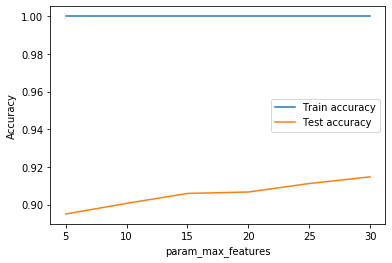

In [147]:
plotParameterChange('param_max_features', scores)

### Tuning min_samples_leaf
Finding the optimum values for min_samples_leaf and understand how the value of min_samples_leaf impacts the overall accuracy of the ensemble.

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [148]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 100)}

scores = fitDecisionTree(parameters)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   37.0s finished


{'min_samples_leaf': 50}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.226649      0.085595         0.015113        0.000158   
1       2.571706      0.149831         0.014420        0.000616   
2       2.318734      0.117848         0.014070        0.000473   
3       2.058524      0.104898         0.013840        0.000303   
4       1.964746      0.068663         0.013854        0.000375   

  param_min_samples_leaf                     params  split0_test_score  \
0                     50   {'min_samples_leaf': 50}           0.882758   
1                    150  {'min_samples_leaf': 150}           0.870043   
2                    250  {'min_samples_leaf': 250}           0.866890   
3                    350  {'min_samples_leaf': 350}           0.860366   
4                    450  {'min_samples_leaf': 450}           0.853261   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.907838           0.904467         0.8

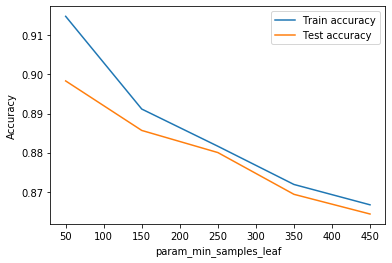

In [149]:
plotParameterChange('param_min_samples_leaf', scores)

### Tuning min_samples_split
Finding the optimum values for min_samples_split and understand how the value of min_samples_split impacts the overall accuracy of the ensemble.

In [150]:
# parameters to build the model on
parameters = {'min_samples_split': range(50, 500, 100)}

scores = fitDecisionTree(parameters)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


{'min_samples_split': 50}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.825235      0.061074         0.015198        0.000289   
1       5.623469      0.050367         0.015732        0.000366   
2       5.487600      0.039939         0.016100        0.001902   
3       5.229590      0.079743         0.017175        0.002792   
4       5.138177      0.172403         0.016282        0.000925   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.886501   
1                     150  {'min_samples_split': 150}           0.882846   
2                     250  {'min_samples_split': 250}           0.873847   
3                     350  {'min_samples_split': 350}           0.870960   
4                     450  {'min_samples_split': 450}           0.869441   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.914678           0.91388

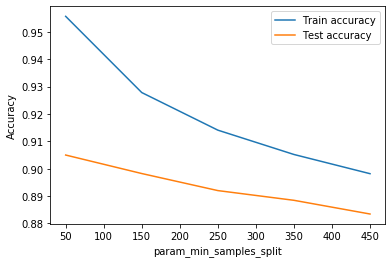

In [151]:
plotParameterChange('param_min_samples_split', scores)

## Random Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using RandomSearchCV as we know the behavior in ranges with random search also we have large feature space.

In [152]:
# Create the parameter grid based on the results of random search 
param_distributions = {
    'max_depth': [4,6,8,10],
    'max_features': [10, 15, 20],
    'min_samples_leaf': [50, 150, 200, 250],
    'min_samples_split': [50, 150, 250], 
    'criterion': ["entropy", "gini"]
}

# Create a based model
dtree = DecisionTreeClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(dtree, param_distributions = param_distributions, cv = n_folds, verbose = 1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.3s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': [10, 15, 20],
                                        'min_samples_leaf': [50, 150, 200, 250],
                                        'min_samples_split': [50, 150, 250]},
                   verbose=1)

In [153]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ', random_search.best_score_,' using ', random_search.best_params_)

We can get accuracy of  0.8639237733559083  using  {'min_samples_split': 50, 'min_samples_leaf': 200, 'max_features': 20, 'max_depth': 10, 'criterion': 'entropy'}


### Fitting the final model with the best parameters obtained from Random search.
### Add the best param values

In [154]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 10, max_features = 20, min_samples_leaf = 200, min_samples_split = 50)

# Fit the model 
modelfit(tree_final, X_train, y_train)


Model Evaluation Metrics:
Accuracy : 0.8743
Sensitivity/Recall : 0.8867
ROC-AUC (Train): 0.950849
CV Score : Mean - 0.9395791 | Std - 0.005379389 | Min - 0.9321174 | Max - 0.9445941


In [155]:
# Making predictions using Test Data
predictions = tree_final.predict(X_test)

In [156]:
# Getting the evaluation metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8251
           1       0.34      0.78      0.47       750

    accuracy                           0.85      9001
   macro avg       0.66      0.82      0.69      9001
weighted avg       0.92      0.85      0.88      9001



In [157]:
# Model evaluation on Test data
getModelEvaluationMetrics(y_test, predictions)

ROC - Area under the Curve Score : 0.8188569466327315
Sensitivity/Recall : 0.7773333333333333
Specificity: 0.8603805599321295
False Positive Rate: 0.13961944006787055
Positive predictive value: 0.33602305475504324
Negative Predictive value: 0.9770162400220204
sklearn precision score value: 0.33602305475504324


In [158]:
# accuracy score
tree_final.score(X_test, y_test)

0.8534607265859349

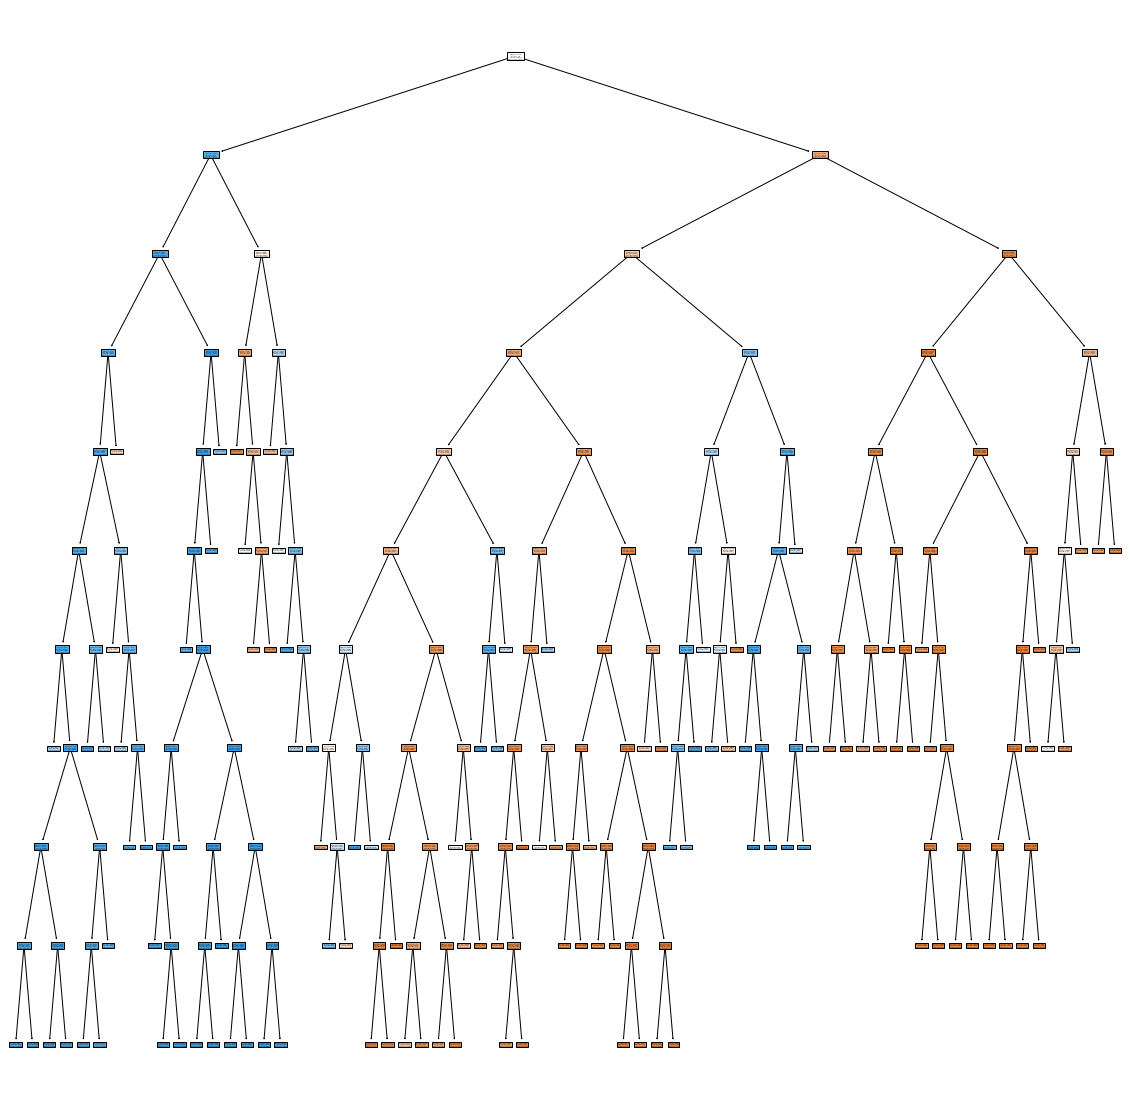

<Figure size 432x288 with 0 Axes>

In [159]:
# Visualizing the tree
fig = plt.figure(figsize = (20, 20))
tree.plot_tree(tree_final, filled = True)
plt.show()
plt.savefig('decision_tree.png')

### Feature Importance

In [160]:
# Getting important features
importance = tree_final.feature_importances_

In [161]:
features = data.drop('churn', axis = 1).columns

In [162]:
# create dataframe
feature_importance = pd.DataFrame({'variables' : features, 'importance_percentage' : importance * 100})
feature_importance = feature_importance[['variables', 'importance_percentage']]
feature_importance

,variables,importance_percentage
0,arpu_6,0.000000
1,arpu_7,0.000000
2,arpu_8,0.000000
3,onnet_mou_6,0.000000
4,onnet_mou_7,0.251347
...,...,...
215,change_in_last_recharge_month_end_8,0.312368
216,change_in_total_data_recharge_amount_8,0.000000
217,change_in_total_recharge_amount_8,0.088994
218,change_in_total_calls_8,0.304839


In [163]:
# sorting important features based on value
feature_importance = feature_importance.sort_values('importance_percentage', ascending = False).reset_index(drop = True)
feature_importance

,variables,importance_percentage
0,total_ic_mou_8,43.344116
1,av_rech_amt_data_8,8.004625
2,change_in_roam_ic_mou_8,7.976943
3,max_rech_data_8,7.924511
4,roam_og_mou_8,6.103811
...,...,...
215,max_rech_amt_7,0.000000
216,max_rech_amt_8,0.000000
217,total_rech_data_6,0.000000
218,total_rech_data_7,0.000000


Extracting top 30 features.

In [164]:
# extracting top 'n' features
top_n = 30
top_features = feature_importance.variables[0 : top_n]

In [165]:
# Indexes of top 30 features
top_features

0                          total_ic_mou_8
1                      av_rech_amt_data_8
2                 change_in_roam_ic_mou_8
3                         max_rech_data_8
4                           roam_og_mou_8
5                        loc_ic_t2f_mou_8
6                 total_recharge_amount_8
7                change_in_total_og_mou_8
8                          total_og_mou_8
9                            offnet_mou_8
10                     last_day_rch_amt_8
11                       loc_og_t2c_mou_7
12                          roam_og_mou_7
13                       loc_og_t2m_mou_7
14                        max_rech_data_7
15                            vol_3g_mb_7
16                       std_ic_t2m_mou_8
17                          roam_ic_mou_8
18           total_data_recharge_amount_7
19                           loc_og_mou_8
20             change_in_total_rech_amt_8
21             change_in_total_internet_8
22                          total_calls_8
23           change_in_last_day_rc

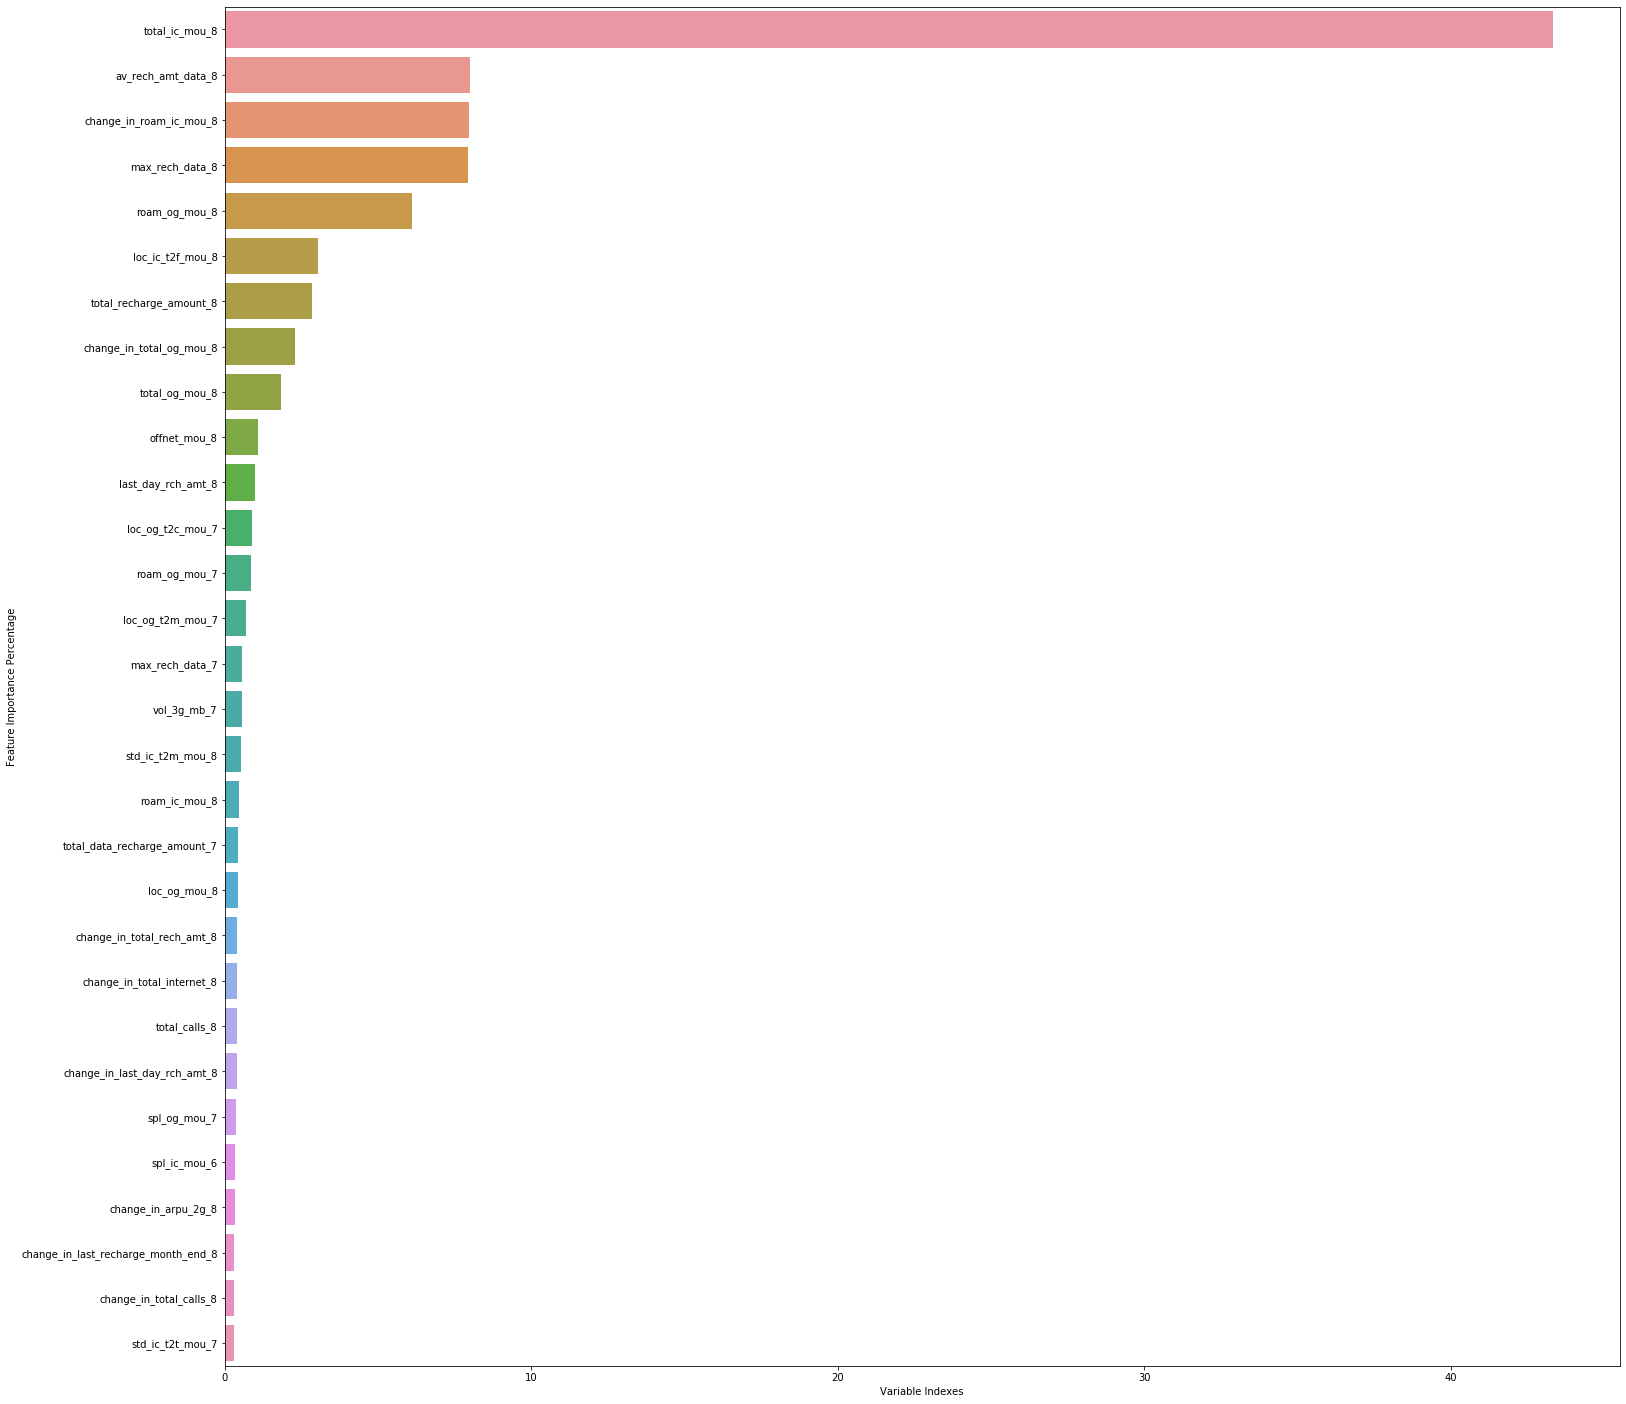

In [166]:
# Plotting Importance features
plt.figure(figsize = (25,25))
sns.barplot(x = 'importance_percentage', y = 'variables', data = feature_importance[0 : top_n])
plt.xlabel('Variable Indexes')
plt.ylabel('Feature Importance Percentage')
plt.show()

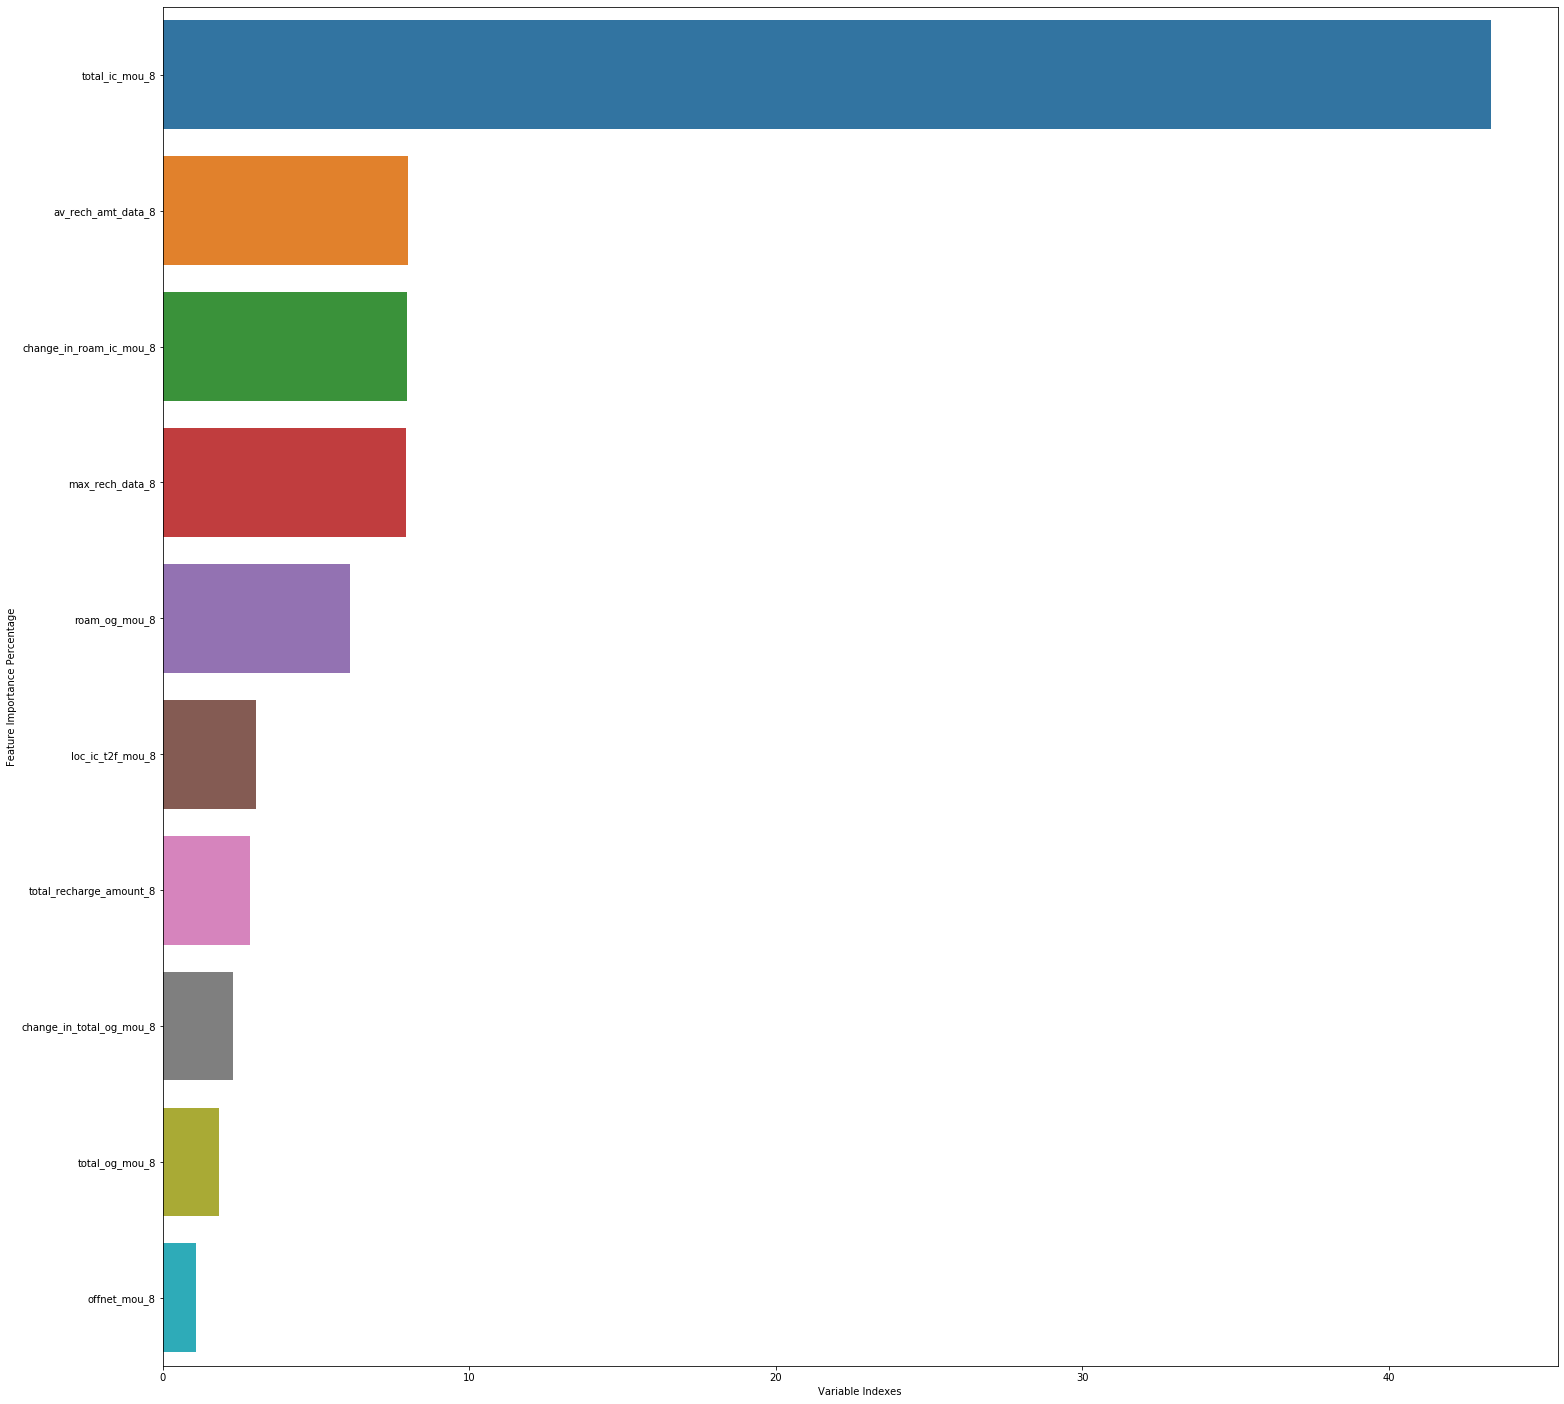

In [167]:
# Plotting Importance features for top 10
plt.figure(figsize = (25,25))
sns.barplot(x = 'importance_percentage', y = 'variables', data = feature_importance[0 : 10])
plt.xlabel('Variable Indexes')
plt.ylabel('Feature Importance Percentage')
plt.show()

In [168]:
feature_importance.variables[0 : 10]

0              total_ic_mou_8
1          av_rech_amt_data_8
2     change_in_roam_ic_mou_8
3             max_rech_data_8
4               roam_og_mou_8
5            loc_ic_t2f_mou_8
6     total_recharge_amount_8
7    change_in_total_og_mou_8
8              total_og_mou_8
9                offnet_mou_8
Name: variables, dtype: object

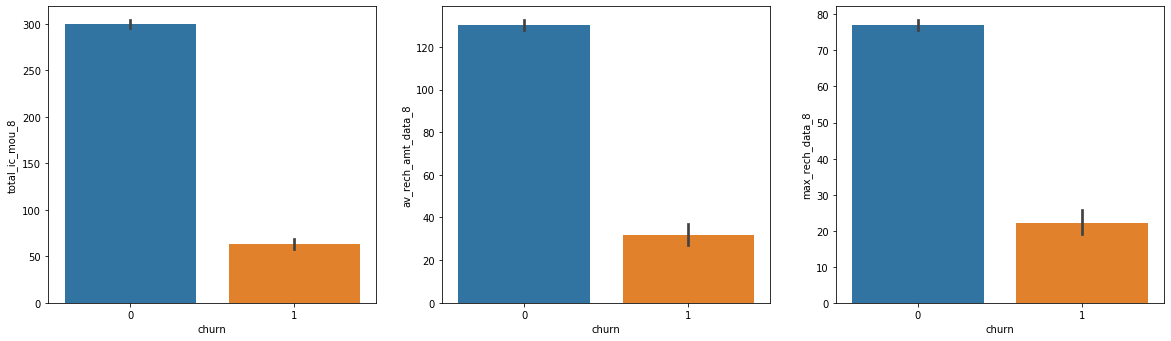

In [170]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_ic_mou_8', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'av_rech_amt_data_8', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'max_rech_data_8', data = data)

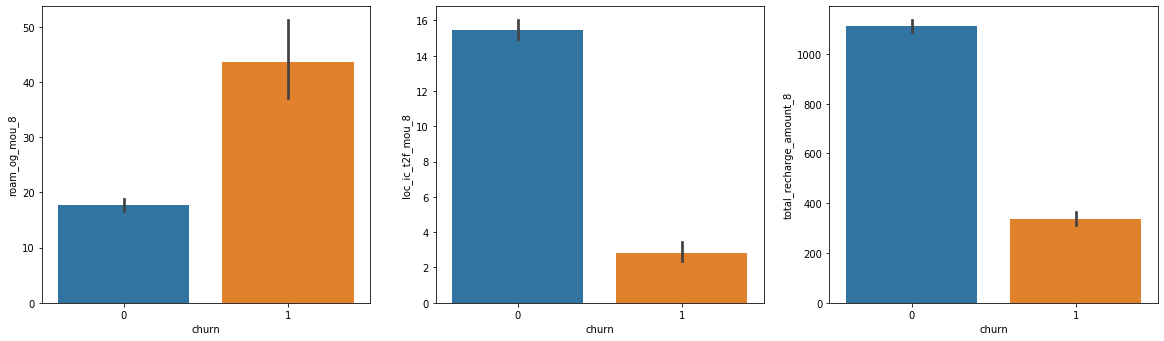

In [171]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'roam_og_mou_8', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'loc_ic_t2f_mou_8', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'total_recharge_amount_8', data = data)

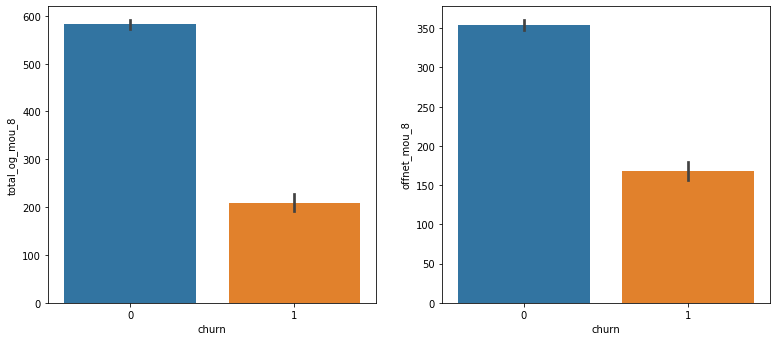

In [173]:
#Create Bar Plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_og_mou_8', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'offnet_mou_8', data = data)

# Conclusion:

From the above plots we can observe that those are the top 10 features which are very much important in predicting the customer churn.

- **total_ic_mou_8** : If there is any decrease in the Incoming calls monthly usage in the 8th month, we can offer few special packages if there is a decrement in the incoming calls.
- **av_rech_amt_data_8, max_rech_data_8, total_recharge_amount_8** : If the user has not recharged or any pattern in decrease in the recharge amount for internet and general usage is observed, the customer is highly likely to churn.
- **change_in_roam_ic_mou_8** : Can offer the customer if the person is in roaming zones in 8th month and there is a decrease in the roaming incoming calls.
- **roam_og_mou_8** : If the user is not using the network for outgoing calls while roaming, and there are high chances of churning suggesting the user is not happy with the service. Hence few special packages for roaming and better customer support might help in retaining the customer.
- **loc_ic_t2f_mou_8** : If the user is getting more number of incoming local calls, and has a good usage rate then he/she is not likely to churn.
- **change_in_total_og_mou_8, total_og_mou_8** : Can offer the customer in 8th month and there is a decrease in the outgoing calls, meaning he/she is not using the network.
- **offnet_mou_8** : All kind of calls outside the operator T network increases in the 8th month then the user is not likely to churn. If there is a drop in such usage, the customer is tending to churn.

# Recommended Strategies:
By observing the above conclusions, we can understand that
- The roaming charges are on the higher side, which is letting the customers to use the network less and tending to churn. So any special packages with reasonable roaming prices might attract users to retain to the network.
- If there is any sudden increase in the recharge amounts, and the user might opt to rechareg with less amount packages with less features. Recharge amounts must also be charged reasonably and taken care of.


# Model Comparisions:



| Model | Sensitivity (Train/Test) | Specificity (Train/Test) | ROC - Area under curve (Train/Test) | 
| --- | --- | --- | --- |
| Logistic Regression | <font color = 'red'>**84.1%**</font> / <font color='red'>**80.1%**</font> | **84.3% / 85.2%** | **0.84 / 0.83** |
| Random Forest | **88.0% / 72.4%** | **88.4% / 87.5%** | **0.88 / 0.80** |
| XGBoost | **100% / 70.8%** | **99.1% / 90.6%** | **0.99 / 0.81** |

Among all the three models, __Logistic Regression__ is giving us better results with good Sensitivity/Recall values.